# dependencies

In [ ]:
!pip install sentence-transformers transformers accelerate
!pip install generativeai
!pip install pandas
!pip install google-generativeai

In [ ]:
!git clone https://github.com/shatinz/tripreport.git

Cloning into 'tripreport'...
fatal: could not read Username for 'https://github.com': No such device or address


# extracting tables and reports


In [1]:
#1.extracting links
import requests
from bs4 import BeautifulSoup

url = "https://www.erowid.org/experiences/exp.cgi?S1=18&ShowViews=0&Cellar=0&Start=0&Max=1149"
response = requests.get(url, verify=False)  # Disable SSL verification
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tr elements with class "exp-list-row"
rows = soup.find_all('tr', class_='exp-list-row')

# Extract href from the <a> tag within each row
links = []
for row in rows:
    link_tag = row.find('a')
    if link_tag and 'href' in link_tag.attrs:
        links.append("https://www.erowid.org/experiences/" + link_tag['href'])

# Print the extracted links
for link in links:
    print(link)

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


https://www.erowid.org/experiences/exp.php?ID=118252
https://www.erowid.org/experiences/exp.php?ID=112397
https://www.erowid.org/experiences/exp.php?ID=96444
https://www.erowid.org/experiences/exp.php?ID=64048
https://www.erowid.org/experiences/exp.php?ID=62835
https://www.erowid.org/experiences/exp.php?ID=34866
https://www.erowid.org/experiences/exp.php?ID=113441
https://www.erowid.org/experiences/exp.php?ID=113133
https://www.erowid.org/experiences/exp.php?ID=99695
https://www.erowid.org/experiences/exp.php?ID=94632
https://www.erowid.org/experiences/exp.php?ID=103790
https://www.erowid.org/experiences/exp.php?ID=96614
https://www.erowid.org/experiences/exp.php?ID=106677
https://www.erowid.org/experiences/exp.php?ID=89887
https://www.erowid.org/experiences/exp.php?ID=98866
https://www.erowid.org/experiences/exp.php?ID=101485
https://www.erowid.org/experiences/exp.php?ID=101541
https://www.erowid.org/experiences/exp.php?ID=93315
https://www.erowid.org/experiences/exp.php?ID=96521
http

In [2]:
#extracting html of tables
import requests
from bs4 import BeautifulSoup
from IPython.display import display

# Assuming 'links' list from the previous cell is available

extracted_data = []

for link in links:
    try:
        response = requests.get(link, verify=False)
        soup = BeautifulSoup(response.content, 'html.parser')

        substance_div = soup.find('div', class_='substance')
        substance = substance_div.text.strip() if substance_div else None

        dosechart_table = soup.find('table', class_='dosechart')
        dosechart = str(dosechart_table) if dosechart_table else None

        bodyweight_table = soup.find('table', class_='bodyweight')
        bodyweight = str(bodyweight_table) if bodyweight_table else None

        footdata_table = soup.find('table', class_='footdata')
        footdata = str(footdata_table) if footdata_table else None

        extracted_data.append({
            'link': link,
            'substance': substance,
            'dosechart': dosechart,
            'bodyweight': bodyweight,
            'footdata': footdata
        })

    except Exception as e:
        print(f"Error processing link {link}: {e}")

# You can now process the extracted_data list, for example, print it
display(extracted_data)

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097

[{'link': 'https://www.erowid.org/experiences/exp.php?ID=118252',
  'substance': 'DMT Fumarate & Harmala Alkaloids',
  'dosechart': '<table class="dosechart">\n<tr>\n<td align="right" class="dosechart-time">DOSE:<br/> T+ 0:00</td>\n<td align="center" class="dosechart-amount">1 - 3 g</td>\n<td align="center" class="dosechart-method">oral</td>\n<td class="dosechart-substance"><a href="/plants/kratom/">Kratom</a></td>\n<td class="dosechart-form">(daily)</td>\n</tr>\n<tr>\n<td align="right" class="dosechart-time">\xa0 T+ 0:00</td>\n<td align="center" class="dosechart-amount">210 mg</td>\n<td align="center" class="dosechart-method">oral</td>\n<td class="dosechart-substance">Harmine</td>\n<td class="dosechart-form">(capsule)</td>\n</tr>\n<tr>\n<td align="right" class="dosechart-time">\xa0 T+ 0:00</td>\n<td align="center" class="dosechart-amount">210 mg</td>\n<td align="center" class="dosechart-method">oral</td>\n<td class="dosechart-substance"><a href="/chemicals/harmala/">Tetrahydroharmine<

In [ ]:
#mapping scrapted tables html to schema
import pandas as pd
from bs4 import BeautifulSoup

schema_fields = [
    "previous_experience",
    "set_and_setting",
    "dose_amount", # Renamed dose_and_route to dose_amount
    "dose_method", # Added new field for dose method
    "before_after_changes",
    "extraordinary_thinking",
    "combination_with_other_substances",
    "intention",
    "experience_phases",
    "onset_description",
    "perceived_realness",
    "objective_elements",
    "entities_or_other_beings",
    "childhood_trauma",
    "time_relation",
    "sex_effects",
    "self_love_experience",
    "semantic_relations",
    "year_of_experience",
    "age",
    "gender",
    "substance_used",
    "most_important_element"
]

processed_reports = []

for report_data in extracted_data:
    processed_report = {}
    for field in schema_fields:
        processed_report[field] = None  # Initialize all fields to None

    # Map scraped data to schema_fields
    if report_data.get('substance'):
        processed_report['substance_used'] = report_data['substance']

    if report_data.get('bodyweight'):
        bodyweight_soup = BeautifulSoup(report_data['bodyweight'], 'html.parser')
        bodyweight_td = bodyweight_soup.find('td', class_='bodyweight-amount')
        processed_report['age'] = bodyweight_td.text.strip() if bodyweight_td else None

    if report_data.get('footdata'):
        footdata_soup = BeautifulSoup(report_data['footdata'], 'html.parser')

        year_td = footdata_soup.find('td', class_='footdata-expyear')
        processed_report['year_of_experience'] = year_td.text.replace('Exp Year:', '').strip() if year_td else None

        gender_td = footdata_soup.find('td', class_='footdata-gender')
        processed_report['gender'] = gender_td.text.replace('Gender:', '').strip() if gender_td else None

        age_td = footdata_soup.find('td', class_='footdata-ageofexp')
        processed_report['age'] = age_td.text.replace('Age at time of experience:', '').strip() if age_td else None

    # Extract dose amount and method from dosechart
    if report_data.get('dosechart'):
        dosechart_soup = BeautifulSoup(report_data['dosechart'], 'html.parser')
        amount_td = dosechart_soup.find('td', class_='dosechart-amount')
        method_td = dosechart_soup.find('td', class_='dosechart-method')

        processed_report['dose_amount'] = amount_td.text.strip() if amount_td else None
        processed_report['dose_method'] = method_td.text.strip() if method_td else None

    processed_reports.append(processed_report)

# Create a pandas DataFrame from the processed data
df_processed_reports = pd.DataFrame(processed_reports)

# Display the first few rows of the DataFrame
display(df_processed_reports.head())

previous_experience set_and_setting dose_amount dose_method  \
0                None            None       60 mg      smoked   
1                None            None         2 g      smoked   
2                None            None       20 ml          IV   
3                None            None                           
4                None            None       20 mg      smoked   

  before_after_changes extraordinary_thinking  \
0                 None                   None   
1                 None                   None   
2                 None                   None   
3                 None                   None   
4                 None                   None   

  combination_with_other_substances intention experience_phases  \
0                              None      None              None   
1                              None      None              None   
2                              None      None              None   
3                              None      None              None   
4                              None      None              None   

  onset_description  ... childhood_trauma time_relation sex_effects  \
0              None  ...             None          None        None   
1              None  ...             None          None        None   
2              None  ...             None          None        None   
3              None  ...             None          None        None   
4              None  ...             None          None        None   

  self_love_experience semantic_relations year_of_experience age gender  \
0                 None               None               2011  19   Male   
1                 None               None               2011  20   Male   
2                 None               None               2012  30   Male   
3                 None               None               2008  23   Male   
4                 None               None               2011  30   Male   

                                      substance_used most_important_element  
0                                                DMT                   None  
1                          DMT, Mushrooms & Cannabis                   None  
2  DMT, Cerebrolysin, Galantamine, CDP-Choline, A...                   None  
3                          MDMA, LSD, DMT & Cannabis                   None  
4                                                DMT                   None  

[5 rows x 23 columns]

In [3]:
#extracting reports html
import requests
from bs4 import BeautifulSoup
import json

# Assuming 'links' list is available from the previous scraping step

report_html_contents = []

for link in links:
    try:
        response = requests.get(link, verify=False) # Disable SSL verification
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)
        report_html_contents.append({
            'link': link,
            'html_content': response.text # Store text content instead of bytes
        })
        print(f"Fetched content for: {link}")
    except requests.exceptions.RequestException as e:
        print(f"Error fetching content for {link}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred while fetching {link}: {e}")

print(f"Finished fetching content for {len(report_html_contents)} reports.")

# Save the scraped data to a JSON file
with open('reports_html.json', 'w') as f:
    json.dump(report_html_contents, f, indent=4)

print("Scraped HTML data saved to reports_html.json")

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118252
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112397


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96444
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=64048


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62835


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=34866


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113441
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113133


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99695
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94632


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103790
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96614


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106677
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89887


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98866
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101485


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101541
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93315
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96521


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94429
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93145


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80226
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82934


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86665
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83719


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82837
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80880


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76614
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75003


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70283
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66730


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65793
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65384


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=58800
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=58907


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=52797


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=46854


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=46856
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41106


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=30919
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=22238


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=31979
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=25157


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=23350
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=16314


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=8842
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=2205


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1851
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1841


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1839
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118625


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117294
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117473


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102105
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115502


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114947
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100673


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99247
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106448


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106105
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108109


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113511
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106818


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101367
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102952


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112845


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112640
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112771


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111847
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87759


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96140
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85721


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100953
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99900


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103249
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95151


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109084
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100929


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97363
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110185


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108821
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91964


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110432
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81462


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101884
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108077


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94599
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90113


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90263
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88428


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107582
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100109


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97591
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90557


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101998
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87447


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80512
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90269


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83098
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92381


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94031
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94073


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94770
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89351


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93223
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88824


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91352
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94174


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86537
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92625


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93030
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90577


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95155
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94274


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95087
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93105


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92355
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92678


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87176
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92499


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87906
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89948


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88380
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80822


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87505


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86649
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81033


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85207
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86874


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82862
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86830


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80249
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80701


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85120
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82670


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=67597
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76492


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80765
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77678


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=72899
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76820
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70374


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78447
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=69969


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=64854
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65781


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=63917
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=61113


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=58801
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=55512


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56682
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56063


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56829
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=54071


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=49359
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=49585


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=50526
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=43682


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=42523
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44849


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=42167
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=40974


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=40230
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41279


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=39857
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=36721


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=36375
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=27373


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=10437
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=20717


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=20398
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=10333


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=12666
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=11258


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: In

Fetched content for: https://www.erowid.org/experiences/exp.php?ID=10622
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=9570


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=9304
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=9024


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=8979
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=8667


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=7237
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=7143


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=4485
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=131


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=2237
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1961


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1857
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1843


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1775
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1768


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1766
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118689


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118604
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118476


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118247
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118615


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117641
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118110


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117426
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115105


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116772
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106049


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116663
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116515


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116390
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116303


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116186
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115707


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106902
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115472


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115605
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115594


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99101
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90894


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96872
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115425


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109508
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115383


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107550
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115363


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107218
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101076


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103784


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105645
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115095


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106135
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115023


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100357
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102069


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102177
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107029


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114662
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103050


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105526


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101977


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106095
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114384


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114245
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109833


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96562
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106746


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114111
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113859


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113764
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108869


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108145
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113027


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103459
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112599


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112767
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112316


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89763
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111538


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112367
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112396


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112319


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104390
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86229


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100002
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101652


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111991
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111980


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101041
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111899


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94731
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101222


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97548
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86420


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93470
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98418


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85775
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92029


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98857
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101882


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91557
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88241


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104339
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97622


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97135


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111391
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111424


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95805
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85257
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95684


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82040
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102266


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98191
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98773


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89885
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91136


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101221
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95295


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108612
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83089


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108203
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84425


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=69407
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110578


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111005
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102307


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109959


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96569
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95250


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110456
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106841


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109541
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110437


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109808
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110091


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98050
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93225


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108734
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88607


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108548
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86700


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106398
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88112


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96811
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99091


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108349
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85344


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105477
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107047


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87414
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96508


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89758
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96437


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86805
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91490


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87212
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89661


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74478
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94487


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99870
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94374


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94114
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96629


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91220
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98522


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96607
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91911


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95701
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94941


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94874
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87761


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90895
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90882


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89910
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87967


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94257
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73648


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70877
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92016


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88203
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81551


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81010
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85066


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80867


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77389
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84719


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83785
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=79622


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77550
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76580


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74289
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75162


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70215
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62911


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80375
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70021


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74170
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76958


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75937
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76298


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74820
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=72595


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73400
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77553


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78748
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=71353


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73569
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75585


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=67591
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70549


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76579
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75344


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=68549
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=68598


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=68124
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65428


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66034
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65454


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65093
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=63124


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=63507
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=61171


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=57936
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=57450


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44397
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=46184


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44002
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=47094


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44176
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=42584


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=43091


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=27378
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=29333


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=34614
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=24161


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=19216
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=20727


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=17319
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=12306


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=12802
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=11336


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097

Fetched content for: https://www.erowid.org/experiences/exp.php?ID=10624
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1859


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1858
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118602


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118981
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118870


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118600
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118123


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113564
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118430


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116998
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85245


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116864
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116766


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116659
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116627


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116415
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116350


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116335
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95624


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116202
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116246


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116012
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115943


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115854
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115579


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115568
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95691


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83260
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90880


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97325
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105010


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113587
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114986


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114961
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100707


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=36606
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76849


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70656
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89114


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44684
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104674


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104758
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105198


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=79747
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73844


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102649
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89224


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111433


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97840
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104982


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56557
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78273


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83189
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70970
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113406


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107046
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113490


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99807
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115179


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80764
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90591


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104835
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95537


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93875
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106379


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114895
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114889


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98620
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112305


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100941
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114748


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114612
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113734


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104016
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114501


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114534
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114530


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114504
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106061


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94596
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103673


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101833
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99429


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100248
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105536


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103297
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105099


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114386
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114381


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101186
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114258


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84936
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100264


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99321
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98045


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95454
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80969


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103238
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97894


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114122
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99808


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85783
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91819


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94727
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90357


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95399


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106916
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88540


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105016


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114078
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101944


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110124
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113883


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113689
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113708


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101234
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106944


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113574


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110770
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111066


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105984
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97815


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110774
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113331


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113274
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113259


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113228
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113235


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113286
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108895


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110333
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108650


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108988
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108843


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93511
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104212


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106777
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106232


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107570
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104257


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83784


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97957


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113008
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103215


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111225
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112908


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112821
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112706


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96739
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93693


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97454
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96825


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112748
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89940


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112657
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101758


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112558


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112544
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98655


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62369
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97943


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81751
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90401


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88460


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62590
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=38530


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112188
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87683


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=79695
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111912


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89308
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112058


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98928
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94883


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103100
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102473


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111947
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101353


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109799
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80529


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111923
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88379


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110821
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88931


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89827
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84821


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96827
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90713


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95231
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97495


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111779
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88798


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90354
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98282


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89371
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89455


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102100
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76735


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92350
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90906


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98541
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89422


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94495
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97496


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66551
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101112


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101730
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111502


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110504
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87823


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101649
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100353


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92219
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111143


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92344
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92347


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111142
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88925


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90006
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81464


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89776
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95965


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93033
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90774


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95909
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81670


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=72863
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95855


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98670
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111056


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83597
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83978


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81145
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44787


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110798
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95475


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94680
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110095


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99269
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93226


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109402
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108954


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=68575
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107794


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107654
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105510


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81249
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88309


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100177
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99864


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92292
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95442


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93067
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92452


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89731
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90224


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93387
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82065


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84957
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76287


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74581
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75676


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78724
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78062


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70737
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41042


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=71961
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77973


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78628
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76862


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77301
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74368


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70744
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77922


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77008
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66145


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75194
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=69023


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=23159
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70238


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=61042
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=29471


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=24076
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66418


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62723
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62447


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=23164
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=61809


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41041
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66957


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=63786
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=63787


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41040
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=60939


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=39724
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=45190


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=34523
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=39702


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=38278
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=54733


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56042
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=44152


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=53698
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=39840


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=32132
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=42199


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=40231
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41038


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=28636
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=24526


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=29187


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=28775
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=27841


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=27713
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=21482


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=17201
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=19659
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=20182


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=20763
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=20293


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=19872
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=19626


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=11028
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=12336


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=14634
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=13214


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=12509
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=4428


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=4602
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=3813


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=3175
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=2964


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=520


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=2799
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=2327


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1856
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1855


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1854
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1853


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1852
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1849


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1848
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1847


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1846
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1845


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1844
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1840
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117630


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118527
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118529


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103152


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118297
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106860


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116975
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116807


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116241
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116110


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116014
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115989


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115976
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115687


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115790
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115563


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115566
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115564


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94673
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106516


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95201
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100618


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108415
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104685


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84741
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101681


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99218
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94973


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90864
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92971


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100203
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106194


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108057


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109499
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95300


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89434
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88034


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73651
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=48880


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113385
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109412


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106202
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=77075


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87166
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90303


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78376
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109547


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107922
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94442


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101670
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87096


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102933
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74348


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104062
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92322


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104205
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103747


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92808
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=67505


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=48050
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105392


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104871


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91410


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111224


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105885
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107909


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115153
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=79335


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74343
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108124
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81052


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114689


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114605
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113624


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110523
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114589


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94516
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90265


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114513
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100724


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104999
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105205


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105140
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105704
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102350


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100195
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100116


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110227
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104004


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92270
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83514


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86612
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95444


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106805
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103863


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105531
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110561


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108051
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113630


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113653
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99867


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107248
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97478


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104375
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104573


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108200
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102794
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102754


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107947
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81894


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112531
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113215


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99502
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106226


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88924
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104651


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109863
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104085


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104148
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105154


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100813
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101445


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112899
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96561


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98631
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98672


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105167
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112734


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87046


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102539
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96585


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=60186
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95512


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90873
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86757


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111542
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112537


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98801
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104219


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87444
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83368


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112299
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=85363


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112150
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76376


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80708
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81391


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90510
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92480


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110218
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111841


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111298
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=52552


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76662
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=45347


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84850
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=76713
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78594


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101229
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111493


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98311
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97612


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65124
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89193


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86000


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90691
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73476


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=71527
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=68151


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84361
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=72656


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74019
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109814


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=64836
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98647


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80806


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81905
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62326


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111450
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84797
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41039


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=75396


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110829
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89657


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93491
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=39165


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98023
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111083


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110920
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104574


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=52517
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89321


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86109
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110636


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108873
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97667


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103970
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100197


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107524
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97254


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78509
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=31038


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89332
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92146


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62075
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82680


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=74571
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=60278


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66085
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62519


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=42150
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=35977


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=26863
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41323


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=54729
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=31055


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=26157
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=24299


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=24260
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=18613


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=15358
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=14823


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=12058
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117406


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=118530
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=117028


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116409
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=116334


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108514
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115703


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115754
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115761


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115663
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115735


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115586
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115567


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108439


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112965
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109610


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=69732
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110090


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78359
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106802


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103033
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92566


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114475
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101657
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93626


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100276


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84435
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105950


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87848
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104233


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78311
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56938


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97536
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104629


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=103216
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80863


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89645
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93474


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114281
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92083


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110020
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86868


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78454
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70108


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107706
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114511


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107417
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99407


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=38366
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81390


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81489
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=73701


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66707
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=45889


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106661
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91678


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88797
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=68819


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107385
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115178


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115207
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115056


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=115106
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102173


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=114750
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80018


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104021
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96242


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=105067
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113957


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113906
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=41932


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=113771
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104787


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101061
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112939


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100745
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=100307


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=104993
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102211


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110909


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97289
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=106309


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=107621
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83217


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=98533
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95714


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112355


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82539


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86731
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91153


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=112487
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=65656


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95932
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87124


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=87672
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97457


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110134
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=62338
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=99678


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56062
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=72788


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=102886
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=47164


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95010
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56244


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=101850
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110085


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=97538
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=88758


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82841
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=61908


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=91990
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=82138


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96574
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=54439


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=111481
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=109249


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=96109
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=69358


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=80766
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86495


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81808
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=86994


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=56929
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=92014


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=81081
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=93717


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=90251
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=83408


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84633
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78233


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=79131
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=72148


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=60889
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=79017


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=47098
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=28809


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95015
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=89534


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=66774


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110899
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=94525


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=110221
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=71366


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=108955
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=95199


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=84499
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=70766


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=78524
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=31802


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=51155
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=31694


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=48312
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=25799


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=36632
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=34118


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=33696
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=17726


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=27538
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=14948


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Fetched content for: https://www.erowid.org/experiences/exp.php?ID=14675
Fetched content for: https://www.erowid.org/experiences/exp.php?ID=1850
Finished fetching content for 1149 reports.
Scraped HTML data saved to reports_html.json


/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.erowid.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
#cleaning reports html
from bs4 import BeautifulSoup, Comment # Import Comment to find HTML comments
import json

cleaned_reports = []

for report_data in report_html_contents:
    link = report_data['link']
    html_content = report_data['html_content']

    try:
        soup = BeautifulSoup(html_content, 'html.parser')

        # Find the div containing the report text
        report_div = soup.find('div', class_='report-text-surround')
        report_text = None

        if report_div:
            # The main report text is often between <!-- Start Body --> and <!-- End Body --> comments
            # within the 'report-text-surround' div. We need to iterate through the contents
            # to find the text nodes and handle <br> tags.
            content_started = False
            extracted_lines = []
            for content in report_div.contents:
                if isinstance(content, Comment) and "Start Body" in content:
                    content_started = True
                    continue
                if isinstance(content, Comment) and "End Body" in content:
                    content_started = False
                    break
                if content_started:
                    if content.name == 'br':
                        extracted_lines.append('\n') # Replace <br> with newline
                    elif isinstance(content, str):
                        extracted_lines.append(content)
                    # You might need to handle other tags within the text if they exist,
                    # but for simple text and line breaks, this should work.
                    # If there are nested tags with text, you might need a recursive approach
                    # or use get_text() on specific elements if they consistently contain text.
                    elif hasattr(content, 'get_text'):
                         extracted_lines.append(content.get_text())


            report_text = "".join(extracted_lines).strip()

        if report_text:
            cleaned_reports.append({
                'link': link,
                'report_text': report_text
            })
            print(f"Successfully extracted report text for {link}")
        else:
            print(f"Warning: Could not extract report text for {link}")

    except Exception as e:
        print(f"Error processing HTML for {link}: {e}")

print(f"Finished extracting report text for {len(cleaned_reports)} reports.")

# Save the cleaned reports to a JSON file
with open('cleaned_reports.json', 'w') as f:
    json.dump(cleaned_reports, f, indent=4)

print("Cleaned report data saved to cleaned_reports.json")

Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=118252
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=112397
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=96444
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=64048
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=62835
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=34866
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=113441
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=113133
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=99695
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=94632
Successfully extracted report text for https://www.erowid.org/experiences/exp.php?ID=1

# sending extracted report to llm


In [ ]:
schema_fields = [
    "previous_experience",
    "set_and_setting",
    "before_after_changes",
    "intention",
    "experience_phases",
    "onset_description",
    "perceived_realness",
    "objective_elements",
    "entities_or_other_beings",
    "childhood_trauma",
    "sex_effects",
    "self_love_experience",
    "most_important_element"
]


# Task
Extract information from each report in "cleaned_reports.json" using the Gemini API to fill a predefined schema. Chunk reports if necessary to fit within token limits, process each chunk separately, and save the extracted information for each report and chunk. Implement sleep time between API calls.

## Load cleaned reports

### Subtask:
Load the cleaned report data from `cleaned_reports.json`.


**Reasoning**:
Load the cleaned report data from the JSON file.



In [5]:
import json

with open('cleaned_reports.json', 'r') as f:
    cleaned_reports = json.load(f)

## Initialize gemini api

### Subtask:
Set up the Gemini API key and model.


**Reasoning**:
Configure the Gemini API key and specify the model for text generation.



In [ ]:
import google.generativeai as genai
import os
from google.colab import userdata

# Configure the Gemini API key
# Ensure you have the API key stored in an environment variable or replace 'YOUR_API_KEY'
genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

# Specify the Gemini model to be used
model_name = "gemini-1.5-flash"

## Define schema and prompt

### Subtask:
Define the schema fields and create a clear prompt for Gemini to extract information from the reports based on the schema, emphasizing concise answers.


**Reasoning**:
Define the schema fields and create the extraction prompt for the Gemini model based on the instructions.



In [ ]:
schema_fields = [
    "previous_experience",
    "set_and_setting",
    "before_after_changes",
    "intention",
    "experience_phases",
    "onset_description",
    "perceived_realness",
    "objective_elements",
    "entities_or_other_beings",
    "childhood_trauma",
    "sex_effects",
    "self_love_experience",
    "most_important_element",
    "experiencing_fear"
]

extraction_prompt = f"""
You are an AI assistant tasked with extracting specific information from a drug experience report.
Your goal is to read the provided report text and extract information for the following fields:
{', '.join(schema_fields)}

For each field, provide a concise answer directly related to the field name.
If the information for a field is not present in the report, state "Not specified".

Here is the report text:
{{report_text}}

Please provide the extracted information in a structured format (e.g., JSON or a clear list of key-value pairs).
"""

print(extraction_prompt)


You are an AI assistant tasked with extracting specific information from a drug experience report.
Your goal is to read the provided report text and extract information for the following fields:
previous_experience, set_and_setting, before_after_changes, intention, experience_phases, onset_description, perceived_realness, objective_elements, entities_or_other_beings, childhood_trauma, sex_effects, self_love_experience, most_important_element, experiencing_fear

For each field, provide a concise answer directly related to the field name.
If the information for a field is not present in the report, state "Not specified".

Here is the report text:
{report_text}

Please provide the extracted information in a structured format (e.g., JSON or a clear list of key-value pairs).



## Process reports with gemini

### Subtask:
Iterate through each cleaned report. For each report:
- Check if the report text needs chunking to fit within Gemini's token limit.
- If chunking is needed, split the report into smaller chunks.
- Send each chunk (or the whole report if no chunking is needed) to the Gemini API with the defined prompt.
- Process Gemini's response to extract the schema information.
- Store the extracted information for each report, keeping track of which chunk it came from if chunking was used.
- Implement a sleep time between API calls to avoid rate limits or token errors.


**Reasoning**:
Iterate through each cleaned report, chunk if necessary, send to Gemini API, process response, store extracted data, and implement sleep.



In [ ]:
import time

extracted_data_from_llm = []
# A rough estimate of token limit for Gemini 1.5 Flash, considering prompt size and response size
# This might need adjustment based on actual usage and model capabilities
TOKEN_LIMIT = 10000  # Example token limit, adjust as needed
SLEEP_TIME = 5  # seconds

for report_data in cleaned_reports:
    link = report_data['link']
    report_text = report_data['report_text']
    report_chunks = []

    # Simple chunking mechanism based on character count as a proxy for tokens
    # A more sophisticated approach would use a proper tokenizer
    if len(report_text) > TOKEN_LIMIT * 0.8: # Chunk if text is close to the limit
        # Split into chunks roughly based on token limit
        chunk_size = int(TOKEN_LIMIT * 0.7) # Make chunks smaller than the limit
        report_chunks = [report_text[i:i + chunk_size] for i in range(0, len(report_text), chunk_size)]
        print(f"Report {link} chunked into {len(report_chunks)} parts.")
    else:
        report_chunks = [report_text]
        print(f"Report {link} does not require chunking.")

    for i, chunk in enumerate(report_chunks):
        print(f"Processing chunk {i+1}/{len(report_chunks)} for report {link}")
        prompt = extraction_prompt.format(report_text=chunk)

        try:
            # Send prompt to Gemini API
            model = genai.GenerativeModel(model_name)
            response = model.generate_content(prompt)

            # Process the response
            # Assuming the response is in a format that can be directly used or easily parsed
            # This part might need significant adjustment based on Gemini's actual output format
            extracted_info = {
                'link': link,
                'chunk_index': i,
                'extracted_data': response.text # Store the raw response text for now
            }
            extracted_data_from_llm.append(extracted_info)
            print(f"Successfully processed chunk {i+1} for {link}")

        except Exception as e:
            print(f"Error processing chunk {i+1} for {link}: {e}")
            extracted_data_from_llm.append({
                'link': link,
                'chunk_index': i,
                'extracted_data': f"Error: {e}"
            })

        # Implement sleep time
        time.sleep(SLEEP_TIME)
        print(f"Sleeping for {SLEEP_TIME} seconds.")

# The extracted_data_from_llm list now contains the results for all reports and chunks
# You can further process or save this list as needed
# For this subtask, we just populate the list.

Report https://www.erowid.org/experiences/exp.php?ID=118252 chunked into 4 parts.
Processing chunk 1/4 for report https://www.erowid.org/experiences/exp.php?ID=118252
Error processing chunk 1 for https://www.erowid.org/experiences/exp.php?ID=118252: HTTPConnectionPool(host='localhost', port=38591): Read timed out. (read timeout=600.0)
Sleeping for 5 seconds.
Processing chunk 2/4 for report https://www.erowid.org/experiences/exp.php?ID=118252


KeyboardInterrupt: 

# embedding tripreports

In [6]:
import json
from sentence_transformers import SentenceTransformer

# Load cleaned reports
with open('cleaned_reports.json', 'r') as f:
    cleaned_reports = json.load(f)

# Initialize the Gemma embedding model
# You might need to adjust the model name based on available models in sentence-transformers
embedding_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Generate embeddings for each report
report_embeddings = []
for report in cleaned_reports:
    report_text = report['report_text']
    embedding = embedding_model.encode(report_text)
    report_embeddings.append({
        'link': report['link'],
        'embedding': embedding.tolist() # Convert numpy array to list for JSON serialization
    })

# You can now use report_embeddings for further analysis, e.g., similarity search, clustering
# For example, save the embeddings to a JSON file
with open('report_embeddings.json', 'w') as f:
    json.dump(report_embeddings, f, indent=4)

print(f"Generated embeddings for {len(report_embeddings)} reports and saved to report_embeddings.json")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

# New Section

*italicized text*# New Section


# adding df processedd reports

In [ ]:
# Embedding df_processed_reports and adding to report_embeddings

# Assuming 'embedding_model' is already initialized from a previous step
# Assuming 'df_processed_reports' is available from a previous step
# Assuming 'cleaned_reports' is available from a previous step and has the links

# Create a combined text representation for each row in the DataFrame
df_processed_reports['combined_text'] = df_processed_reports.apply(
    lambda row: ' '.join(f"{col}: {row[col]}" for col in df_processed_reports.columns if col not in ['link', 'combined_text'] and pd.notna(row[col])),
    axis=1
)

# Generate embeddings for the combined text and associate with the original link
df_embeddings = []
# Iterate through the processed reports and use the link from the original cleaned_reports
for index, row in df_processed_reports.iterrows():
    combined_text = row['combined_text']
    embedding = embedding_model.encode(combined_text)
    # Find the corresponding link from the cleaned_reports using the index
    original_link = cleaned_reports[index]['link']
    df_embeddings.append({
        'link': original_link,
        'embedding': embedding.tolist() # Convert numpy array to list for JSON serialization
    })

# Append the new embeddings to the existing report_embeddings list
# Load existing embeddings first if the list is not already in memory
try:
    with open('report_embeddings.json', 'r') as f:
        report_embeddings = json.load(f)
except FileNotFoundError:
    report_embeddings = [] # Start with an empty list if the file doesn't exist

report_embeddings.extend(df_embeddings)

# Save the updated embeddings to a JSON file
with open('report_embeddings.json', 'w') as f:
    json.dump(report_embeddings, f, indent=4)

print(f"Generated embeddings for {len(df_embeddings)} processed reports and added to report_embeddings.json.")
print(f"Total embeddings in report_embeddings.json: {len(report_embeddings)}")

IndexError: list index out of range

#clustering




In [ ]:
import json
import numpy as np
import hdbscan
import pandas as pd

# Load embeddings from the JSON file
with open('report_embeddings.json', 'r') as f:
    report_embeddings_data = json.load(f)

# Extract embeddings and links
links = [item['link'] for item in report_embeddings_data]
embeddings = np.array([item['embedding'] for item in report_embeddings_data])

# Apply HDBSCAN clustering
# You might need to adjust the parameters (e.g., min_cluster_size, min_samples)
# based on your data and desired clustering granularity.
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(embeddings)

# Get cluster labels
# -1 typically indicates noise points (points not assigned to any cluster)
cluster_labels = clusterer.labels_

# Add cluster labels back to the data structure
# You can add it to the original list or create a new structure
for i, label in enumerate(cluster_labels):
    report_embeddings_data[i]['hdbscan_cluster_label'] = int(label) # Store as int

# Optionally, save the updated data with cluster labels to a new JSON file
with open('report_embeddings_with_hdbscan_clusters.json', 'w') as f:
    json.dump(report_embeddings_data, f, indent=4)

print(f"Applied HDBSCAN clustering. Found {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)} clusters.")
print(f"Cluster labels added to data and saved to 'report_embeddings_with_hdbscan_clusters.json'.")

# You can also add the cluster labels to the df_processed_reports DataFrame
# Ensure the order of embeddings matches the order of rows in the DataFrame
# This might require aligning by link if the order is not guaranteed
if 'df_processed_reports' in locals():
    # Create a mapping from link to cluster label
    link_to_cluster = {item['link']: item['hdbscan_cluster_label'] for item in report_embeddings_data}
    # Add cluster labels to the DataFrame based on the 'link' column
    # Make sure the 'link' column exists in df_processed_reports and matches the links in report_embeddings_data
    if 'link' in df_processed_reports.columns:
        df_processed_reports['hdbscan_cluster_label'] = df_processed_reports['link'].map(link_to_cluster)
        print("HDBSCAN cluster labels added to df_processed_reports DataFrame.")
    else:
        print("Warning: 'link' column not found in df_processed_reports. Could not add cluster labels to DataFrame.")

# --- Add code for analyzing clusters ---

# Convert the data with cluster labels to a pandas DataFrame for easier analysis
df_clustered_reports = pd.DataFrame(report_embeddings_data)

# Display the number of reports in each cluster
print("\nNumber of reports per cluster:")
print(df_clustered_reports['hdbscan_cluster_label'].value_counts())

# Function to display example reports from a specific cluster
def display_example_reports(cluster_label, num_examples=3):
    print(f"\nExample reports from Cluster {cluster_label}:")
    cluster_reports = df_clustered_reports[df_clustered_reports['hdbscan_cluster_label'] == cluster_label]
    if cluster_reports.empty:
        print("No reports found in this cluster.")
        return

    # Display the links of example reports
    for i, row in cluster_reports.head(num_examples).iterrows():
        print(f"- {row['link']}")

# Example usage: Display example reports from the first few clusters (excluding noise)
unique_clusters = sorted(df_clustered_reports['hdbscan_cluster_label'].unique())
for cluster_label in unique_clusters:
    if cluster_label != -1: # Exclude noise cluster
        display_example_reports(cluster_label)

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Applied HDBSCAN clustering. Found 0 clusters.
Cluster labels added to data and saved to 'report_embeddings_with_hdbscan_clusters.json'.

Number of reports per cluster:
hdbscan_cluster_label
-1    99
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


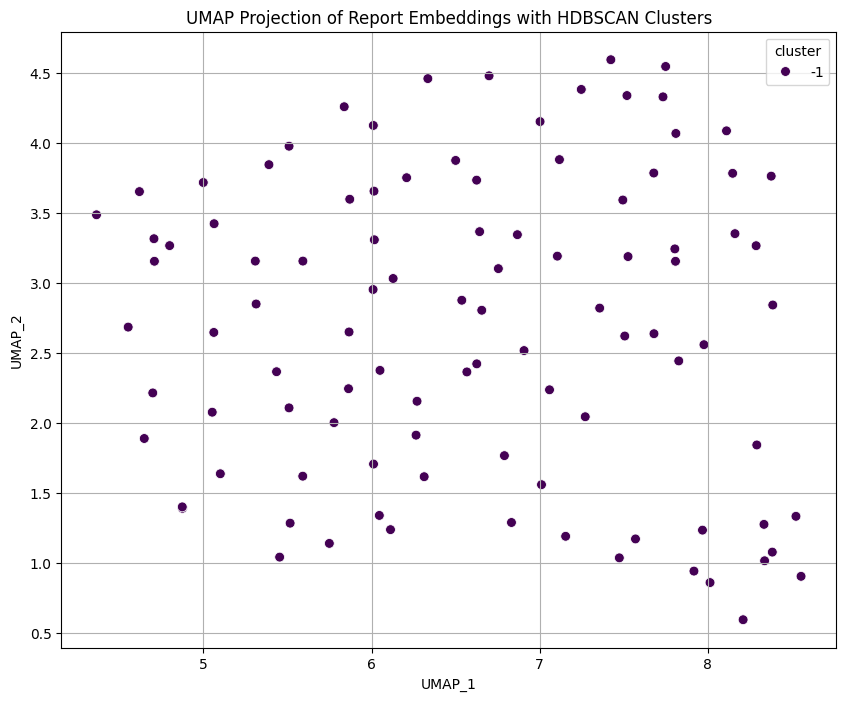

UMAP_1    UMAP_2  cluster  \
0  7.679388  3.782848       -1   
1  5.434957  2.363998       -1   
2  7.804708  3.240989       -1   
3  7.118111  3.878707       -1   
4  5.749062  1.137877       -1   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

# Load embeddings and cluster labels from the JSON file
try:
    with open('report_embeddings_with_hdbscan_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_hdbscan_clusters.json' not found. Please run the clustering step first.")
    report_data_with_clusters = []

if report_data_with_clusters:
    # Extract embeddings and cluster labels
    embeddings = np.array([item['embedding'] for item in report_data_with_clusters])
    cluster_labels = np.array([item['hdbscan_cluster_label'] for item in report_data_with_clusters])
    links = [item['link'] for item in report_data_with_clusters]

    # Apply UMAP for dimensionality reduction
    # You might need to adjust the parameters (e.g., n_neighbors, min_dist, n_components)
    # based on your data and desired visualization
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings = reducer.fit_transform(embeddings)

    # Create a DataFrame for easy plotting
    df_umap = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
    df_umap['cluster'] = cluster_labels
    df_umap['link'] = links

    # Plot the UMAP embeddings
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title('UMAP Projection of Report Embeddings with HDBSCAN Clusters')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap.head())
else:
    print("No data loaded for UMAP visualization.")

In [ ]:
# You might need to install keybert if you haven't already
# !pip install keybert

from keybert import KeyBERT
import pandas as pd
import numpy as np
import json
from sklearn.metrics.pairwise import cosine_similarity

# Load cleaned reports
try:
    with open('cleaned_reports.json', 'r') as f:
        cleaned_reports = json.load(f)
except FileNotFoundError:
    print("Error: 'cleaned_reports.json' not found. Please make sure you have run the report cleaning step.")
    cleaned_reports = []

# Load embeddings and cluster labels from the JSON file
try:
    with open('report_embeddings_with_hdbscan_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_hdbscan_clusters.json' not found. Please run the clustering step first.")
    report_data_with_clusters = []

if not cleaned_reports or not report_data_with_clusters:
    print("Missing required data. Cannot perform KeyBERT analysis.")
else:
    # Create a DataFrame from the clustered data for easier manipulation
    df_clustered_reports = pd.DataFrame(report_data_with_clusters)

    # Get the list of unique cluster labels (excluding noise, typically -1)
    unique_clusters = sorted(df_clustered_reports['hdbscan_cluster_label'].unique())
    non_noise_clusters = [c for c in unique_clusters if c != -1]

    if not non_noise_clusters:
        print("No non-noise clusters found to analyze.")
    else:
        print("Analyzing themes for central reports of each cluster using KeyBERT:")

        # Initialize KeyBERT model
        # You can specify a different embedding model if needed
        kw_model = KeyBERT()

        # Create a dictionary to easily access embeddings by link
        embedding_dict = {item['link']: np.array(item['embedding']) for item in report_data_with_clusters}


        for target_cluster_label in non_noise_clusters:
            print(f"\n--- Analyzing Central Reports of Cluster {target_cluster_label} ---")

            # Get the links and embeddings for reports in the target cluster
            cluster_data = df_clustered_reports[df_clustered_reports['hdbscan_cluster_label'] == target_cluster_label]
            cluster_links = cluster_data['link'].tolist()
            cluster_embeddings = np.array([embedding_dict[link] for link in cluster_links if link in embedding_dict])

            if not cluster_links or cluster_embeddings.shape[0] == 0:
                print(f"No reports or embeddings found for cluster {target_cluster_label}.")
                continue

            # Calculate the average similarity of each report to all other reports in the cluster
            # Compute cosine similarity matrix within the cluster
            similarity_matrix = cosine_similarity(cluster_embeddings)

            # Calculate the average similarity for each report (excluding self-similarity)
            average_similarities = (similarity_matrix.sum(axis=1) - 1) / (similarity_matrix.shape[1] - 1)

            # Add average similarity to the cluster_data DataFrame
            cluster_data = cluster_data.copy() # Avoid SettingWithCopyWarning
            cluster_data['average_similarity'] = average_similarities

            # Select the top N central reports based on average similarity
            num_central_reports = min(5, len(cluster_links)) # Select up to 5 central reports
            central_reports = cluster_data.sort_values(by='average_similarity', ascending=False).head(num_central_reports)
            central_report_links = central_reports['link'].tolist()

            print(f"Selected {len(central_report_links)} central reports for Cluster {target_cluster_label}:")
            for link in central_report_links:
                print(f"- {link}")

            # Retrieve the full report text for these central reports from cleaned_reports
            report_text_dict = {report['link']: report['report_text'] for report in cleaned_reports}
            central_reports_text = [report_text_dict[link] for link in central_report_links if link in report_text_dict]

            if not central_reports_text:
                print(f"No report text found for central reports in cluster {target_cluster_label}.")
            else:
                # Concatenate the text of central reports for KeyBERT analysis
                central_document = " ".join(central_reports_text)

                # Extract keywords using KeyBERT
                keywords = kw_model.extract_keywords(
                    central_document,
                    keyphrase_ngram_range=(1, 2), # Consider unigrams and bigrams
                    stop_words='english',
                    use_maxsum=True, # Use Max Sum Similarity for diversity
                    nr_candidates=20, # Number of candidates to consider for diversity
                    top_n=10 # Number of top keywords to extract
                )

                print(f"Top KeyBERT keywords for Central Reports of Cluster {target_cluster_label}:")
                # KeyBERT returns a list of tuples: (keyword, score)
                for keyword, score in keywords:
                    print(f"- {keyword} (Score: {score:.4f})")

                print(f"\nPotential themes based on top keywords from central reports:")
                print(", ".join([keyword for keyword, score in keywords]))

ModuleNotFoundError: No module named 'keybert'

Applied K-Means clustering with 5 clusters.
K-Means cluster labels added to data and saved to 'report_embeddings_with_kmeans_clusters.json'.

Visualizing K-Means clusters using UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


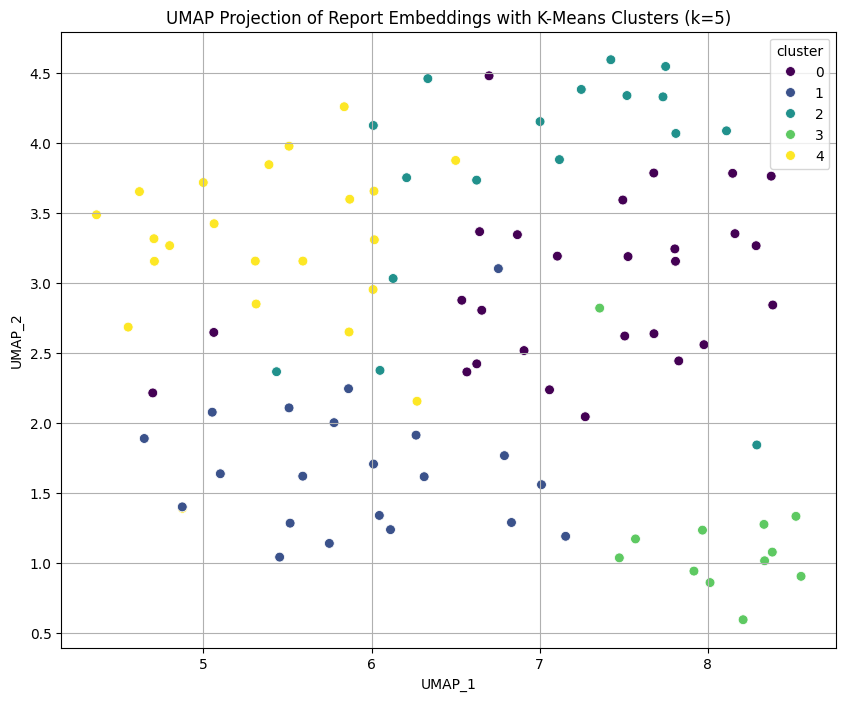

UMAP_1    UMAP_2  cluster  \
0  7.679388  3.782848        0   
1  5.434957  2.363998        2   
2  7.804708  3.240989        0   
3  7.118111  3.878707        2   
4  5.749062  1.137877        1   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...


Number of reports per K-Means cluster:
kmeans_cluster_label
0    27
4    22
1    21
2    17
3    12
Name: count, dtype: int64

Example reports from K-Means Cluster 0:
- https://www.erowid.org/experiences/exp.php?ID=94031
- https://www.erowid.org/experiences/exp.php?ID=94770
- https://www.erowid.org/experiences/exp.php?ID=90577

Example reports from K-Means Cluster 1:
- https://www.erowid.org/experiences/exp.php?ID=93223
- https://www.erowid.org/experiences/exp.php?ID=94174
- https://www.erowid.org/experiences/exp.php?ID=93030

Example reports from K-Means Cluster 2:
- https://www.erowid.org/experiences/exp.php?ID=94073
- https://www.erowid.org/experiences/exp.php?ID=89351
- https://www.erowid.org/experiences/exp.php?ID=91352

Example reports from K-Means Cluster 3:
- https://www.erowid.org/experiences/exp.php?ID=88824
- https://www.erowid.org/experiences/exp.php?ID=92625
- https://www.erowid.org/experiences/exp.php?ID=88380

Example reports from K-Means Cluster 4:
- https://www.erowid

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import json
import umap
import matplotlib.pyplot as plt
import seaborn as sns
# kmeans clustering with  visualization
# Load embeddings from the JSON file
try:
    with open('report_embeddings.json', 'r') as f:
        report_embeddings_data = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings.json' not found. Please run the embedding step first.")
    report_embeddings_data = []

if report_embeddings_data:
    # Extract embeddings and links
    links = [item['link'] for item in report_embeddings_data]
    embeddings = np.array([item['embedding'] for item in report_embeddings_data])

    # Apply K-Means clustering
    # You need to choose the number of clusters (n_clusters)
    n_clusters = 5  # Example: Choose 3 clusters. You might need to experiment with this value.
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(embeddings)

    # Get cluster labels
    cluster_labels_kmeans = kmeans.labels_

    # Add K-Means cluster labels back to the data structure
    # You can add it to the original list or create a new structure
    for i, label in enumerate(cluster_labels_kmeans):
        report_embeddings_data[i]['kmeans_cluster_label'] = int(label) # Store as int

    # Optionally, save the updated data with K-Means cluster labels to a new JSON file
    with open('report_embeddings_with_kmeans_clusters.json', 'w') as f:
        json.dump(report_embeddings_data, f, indent=4)

    print(f"Applied K-Means clustering with {n_clusters} clusters.")
    print(f"K-Means cluster labels added to data and saved to 'report_embeddings_with_kmeans_clusters.json'.")

    # You can also add the cluster labels to the df_processed_reports DataFrame if it exists
    if 'df_processed_reports' in locals():
        # Ensure the order of embeddings matches the order of rows in the DataFrame
        # This might require aligning by link if the order is not guaranteed
        if 'link' in df_processed_reports.columns:
             # Create a mapping from link to cluster label
            link_to_kmeans_cluster = {item['link']: item['kmeans_cluster_label'] for item in report_embeddings_data}
            # Add cluster labels to the DataFrame based on the 'link' column
            df_processed_reports['kmeans_cluster_label'] = df_processed_reports['link'].map(link_to_kmeans_cluster)
            print("K-Means cluster labels added to df_processed_reports DataFrame.")
        else:
            print("Warning: 'link' column not found in df_processed_reports. Could not add K-Means cluster labels to DataFrame.")

    # --- Visualization of K-Means clusters using UMAP ---

    print("\nVisualizing K-Means clusters using UMAP...")

    # Apply UMAP for dimensionality reduction
    # Use the same random_state as for HDBSCAN visualization if you want comparable layouts
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings = reducer.fit_transform(embeddings)

    # Create a DataFrame for easy plotting
    df_umap_kmeans = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
    df_umap_kmeans['cluster'] = cluster_labels_kmeans
    df_umap_kmeans['link'] = links

    # Plot the UMAP embeddings with K-Means cluster labels
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_kmeans,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of Report Embeddings with K-Means Clusters (k={n_clusters})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_kmeans.head())


else:
    print("No embeddings data loaded. Cannot perform K-Means clustering or visualization.")

# --- Add code for analyzing K-Means clusters (similar to HDBSCAN analysis) ---

# Convert the data with K-Means cluster labels to a pandas DataFrame for easier analysis
df_clustered_reports_kmeans = pd.DataFrame(report_embeddings_data)

# Display the number of reports in each K-Means cluster
print("\nNumber of reports per K-Means cluster:")
print(df_clustered_reports_kmeans['kmeans_cluster_label'].value_counts())

# Function to display example reports from a specific K-Means cluster
def display_example_reports_kmeans(cluster_label, num_examples=3):
    print(f"\nExample reports from K-Means Cluster {cluster_label}:")
    cluster_reports = df_clustered_reports_kmeans[df_clustered_reports_kmeans['kmeans_cluster_label'] == cluster_label]
    if cluster_reports.empty:
        print("No reports found in this cluster.")
        return

    # Display the links of example reports
    for i, row in cluster_reports.head(num_examples).iterrows():
        print(f"- {row['link']}")

# Example usage: Display example reports from each K-Means cluster
unique_kmeans_clusters = sorted(df_clustered_reports_kmeans['kmeans_cluster_label'].unique())
for cluster_label in unique_kmeans_clusters:
     display_example_reports_kmeans(cluster_label)

checking accurity of kmeans clustering.

Applied Agglomerative Hierarchical Clustering with 5 clusters.
Agglomerative cluster labels added to data and saved to 'report_embeddings_with_agg_clusters.json'.

Visualizing Agglomerative clusters using UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


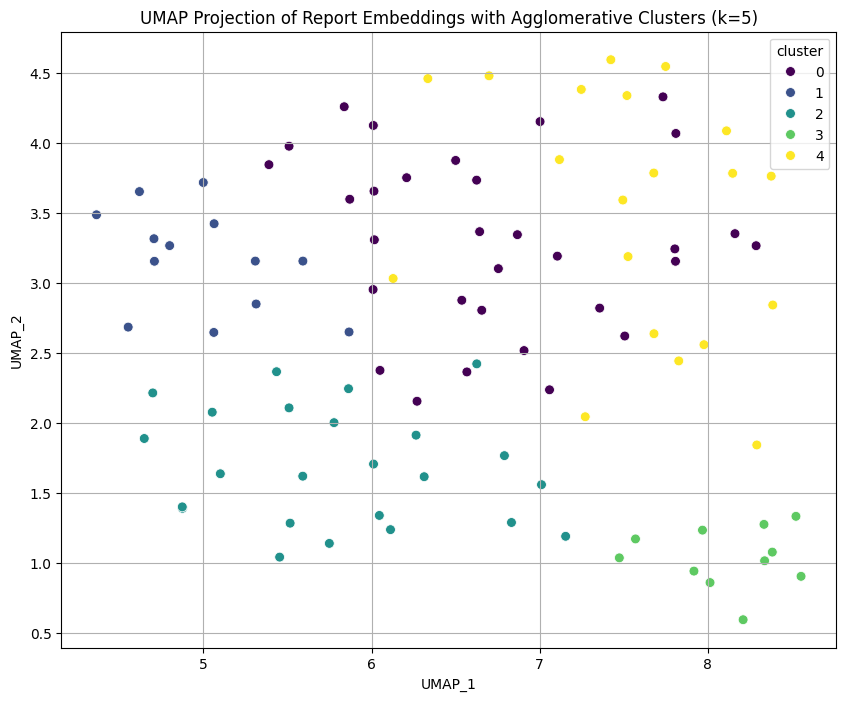

UMAP_1    UMAP_2  cluster  \
0  7.679388  3.782848        4   
1  5.434957  2.363998        2   
2  7.804708  3.240989        0   
3  7.118111  3.878707        4   
4  5.749062  1.137877        2   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...


Number of reports per Agglomerative cluster:
agg_cluster_label
0    31
2    24
4    20
1    13
3    11
Name: count, dtype: int64

Example reports from Agglomerative Cluster 0:
- https://www.erowid.org/experiences/exp.php?ID=94770
- https://www.erowid.org/experiences/exp.php?ID=91352
- https://www.erowid.org/experiences/exp.php?ID=90577

Example reports from Agglomerative Cluster 1:
- https://www.erowid.org/experiences/exp.php?ID=95087
- https://www.erowid.org/experiences/exp.php?ID=87906
- https://www.erowid.org/experiences/exp.php?ID=89948

Example reports from Agglomerative Cluster 2:
- https://www.erowid.org/experiences/exp.php?ID=94073
- https://www.erowid.org/experiences/exp.php?ID=93223
- https://www.erowid.org/experiences/exp.php?ID=94174

Example reports from Agglomerative Cluster 3:
- https://www.erowid.org/experiences/exp.php?ID=88824
- https://www.erowid.org/experiences/exp.php?ID=92625
- https://www.erowid.org/experiences/exp.php?ID=88380

Example reports from Agglomerativ

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import json
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load embeddings from the JSON file
try:
    with open('report_embeddings.json', 'r') as f:
        report_embeddings_data = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings.json' not found. Please run the embedding step first.")
    report_embeddings_data = []

if report_embeddings_data:
    # Extract embeddings and links
    links = [item['link'] for item in report_embeddings_data]
    embeddings = np.array([item['embedding'] for item in report_embeddings_data])

    # Apply Agglomerative Hierarchical Clustering
    # You need to choose the number of clusters (n_clusters) or a distance threshold
    # Here, we'll choose a fixed number of clusters for demonstration, similar to K-Means
    n_clusters_agg = 5  # Example: Choose 5 clusters. You might need to experiment.
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward') # 'ward' minimizes the variance of the clusters being merged
    agg_cluster_labels = agg_clustering.fit_predict(embeddings)

    # Add Agglomerative cluster labels back to the data structure
    for i, label in enumerate(agg_cluster_labels):
        report_embeddings_data[i]['agg_cluster_label'] = int(label) # Store as int

    # Optionally, save the updated data with Agglomerative cluster labels to a new JSON file
    with open('report_embeddings_with_agg_clusters.json', 'w') as f:
        json.dump(report_embeddings_data, f, indent=4)

    print(f"Applied Agglomerative Hierarchical Clustering with {n_clusters_agg} clusters.")
    print(f"Agglomerative cluster labels added to data and saved to 'report_embeddings_with_agg_clusters.json'.")

    # You can also add the cluster labels to the df_processed_reports DataFrame if it exists
    if 'df_processed_reports' in locals():
        if 'link' in df_processed_reports.columns:
             # Create a mapping from link to cluster label
            link_to_agg_cluster = {item['link']: item['agg_cluster_label'] for item in report_embeddings_data}
            # Add cluster labels to the DataFrame based on the 'link' column
            df_processed_reports['agg_cluster_label'] = df_processed_reports['link'].map(link_to_agg_cluster)
            print("Agglomerative cluster labels added to df_processed_reports DataFrame.")
        else:
            print("Warning: 'link' column not found in df_processed_reports. Could not add Agglomerative cluster labels to DataFrame.")


    # --- Visualization of Agglomerative clusters using UMAP ---

    print("\nVisualizing Agglomerative clusters using UMAP...")

    # Apply UMAP for dimensionality reduction
    # Use the same random_state as for previous UMAP visualizations for consistency
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings = reducer.fit_transform(embeddings)

    # Create a DataFrame for easy plotting
    df_umap_agg = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
    df_umap_agg['cluster'] = agg_cluster_labels
    df_umap_agg['link'] = links

    # Plot the UMAP embeddings with Agglomerative cluster labels
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_agg,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of Report Embeddings with Agglomerative Clusters (k={n_clusters_agg})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_agg.head())

else:
    print("No embeddings data loaded. Cannot perform Agglomerative clustering or visualization.")

# --- Add code for analyzing Agglomerative clusters (similar to K-Means analysis) ---

# Convert the data with Agglomerative cluster labels to a pandas DataFrame for easier analysis
df_clustered_reports_agg = pd.DataFrame(report_embeddings_data)

# Display the number of reports in each Agglomerative cluster
print("\nNumber of reports per Agglomerative cluster:")
print(df_clustered_reports_agg['agg_cluster_label'].value_counts())

# Function to display example reports from a specific Agglomerative cluster
def display_example_reports_agg(cluster_label, num_examples=3):
    print(f"\nExample reports from Agglomerative Cluster {cluster_label}:")
    cluster_reports = df_clustered_reports_agg[df_clustered_reports_agg['agg_cluster_label'] == cluster_label]
    if cluster_reports.empty:
        print("No reports found in this cluster.")
        return

    # Display the links of example reports
    for i, row in cluster_reports.head(num_examples).iterrows():
        print(f"- {row['link']}")

# Example usage: Display example reports from each Agglomerative cluster
unique_agg_clusters = sorted(df_clustered_reports_agg['agg_cluster_label'].unique())
for cluster_label in unique_agg_clusters:
     display_example_reports_agg(cluster_label)

**bold text**# gemini cluster theme
Use the Gemini API to find the theme of each cluster based on the 3 most central reports from each cluster, respecting API limitations by chunking the data if necessary.

## Load data and identify central reports

### Subtask:
Load the clustered data and identify the 3 most central reports for each cluster based on embedding similarity.


# send central reports to llm

**Reasoning**:
Load the clustered data, extract embeddings, and identify the 3 most central reports for each cluster based on cosine similarity.



In [ ]:
import numpy as np
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity

# Load embeddings and cluster labels from the JSON file
try:
    with open('report_embeddings_with_kmeans_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_kmeans_clusters.json' not found. Please run the K-Means clustering step first.")
    report_data_with_clusters = []

central_reports_by_cluster = {}

if report_data_with_clusters:
    # Create a DataFrame from the clustered data
    df_clustered_reports = pd.DataFrame(report_data_with_clusters)

    # Get the list of unique cluster labels
    unique_clusters = sorted(df_clustered_reports['kmeans_cluster_label'].unique())
    # For K-Means, we typically analyze all clusters, as there is no 'noise' cluster like in HDBSCAN
    clusters_to_analyze = unique_clusters

    if not clusters_to_analyze:
        print("No clusters found to analyze.")
    else:
        print("Identifying central reports for each cluster:")

        # Create a dictionary to easily access embeddings by link
        embedding_dict = {item['link']: np.array(item['embedding']) for item in report_data_with_clusters}

        for target_cluster_label in clusters_to_analyze:
            print(f"Processing Cluster {target_cluster_label}...")

            # Get the links and embeddings for reports in the target cluster
            cluster_data = df_clustered_reports[df_clustered_reports['kmeans_cluster_label'] == target_cluster_label].copy()
            cluster_links = cluster_data['link'].tolist()
            cluster_embeddings = np.array([embedding_dict[link] for link in cluster_links if link in embedding_dict])

            if not cluster_links or cluster_embeddings.shape[0] == 0:
                print(f"No reports or embeddings found for cluster {target_cluster_label}.")
                continue

            # Calculate the average similarity of each report to all other reports in the cluster
            # Compute cosine similarity matrix within the cluster
            similarity_matrix = cosine_similarity(cluster_embeddings)

            # Calculate the average similarity for each report (excluding self-similarity)
            # Ensure there's more than one report to calculate meaningful average similarity excluding self
            if similarity_matrix.shape[0] > 1:
                average_similarities = (similarity_matrix.sum(axis=1) - 1) / (similarity_matrix.shape[1] - 1)
            else:
                # Handle the case of a single-report cluster (no other reports to compare to)
                average_similarities = np.array([0.0]) # Assign 0 average similarity

            # Add average similarity to the cluster_data DataFrame
            cluster_data['average_similarity'] = average_similarities

            # Select the top 3 central reports based on average similarity
            num_central_reports = min(3, len(cluster_links)) # Select up to 3 central reports
            central_reports = cluster_data.sort_values(by='average_similarity', ascending=False).head(num_central_reports)

            # Store the central reports for this cluster
            central_reports_by_cluster[target_cluster_label] = central_reports.to_dict(orient='records')

            print(f"Identified {len(central_reports)} central reports for Cluster {target_cluster_label}.")

else:
    print("No data loaded for identifying central reports.")

# The central_reports_by_cluster dictionary now contains the 3 most central reports for each non-noise cluster
# You can further process or use this dictionary as needed.

Identifying central reports for each cluster:
Processing Cluster 0...
Identified 3 central reports for Cluster 0.
Processing Cluster 1...
Identified 3 central reports for Cluster 1.
Processing Cluster 2...
Identified 3 central reports for Cluster 2.


## Retrieve report text

### Subtask:
Get the full text for the selected central reports from the cleaned reports data.


**Reasoning**:
Load the cleaned reports and create a dictionary mapping links to report text.



In [ ]:
import json

# Load cleaned reports
try:
    with open('cleaned_reports.json', 'r') as f:
        cleaned_reports = json.load(f)
except FileNotFoundError:
    print("Error: 'cleaned_reports.json' not found. Please make sure you have run the report cleaning step.")
    cleaned_reports = []

# Create a dictionary mapping links to report text
report_text_dict = {report['link']: report['report_text'] for report in cleaned_reports}

# Retrieve the full text for the central reports
central_reports_with_text = {}

if central_reports_by_cluster:
    print("Retrieving full text for central reports:")
    for cluster_label, central_reports_list in central_reports_by_cluster.items():
        central_reports_with_text[cluster_label] = []
        print(f"Processing Cluster {cluster_label}...")
        for report_info in central_reports_list:
            link = report_info['link']
            if link in report_text_dict:
                report_info['report_text'] = report_text_dict[link]
                central_reports_with_text[cluster_label].append(report_info)
                print(f"Retrieved text for: {link}")
            else:
                print(f"Warning: Report text not found for link: {link}")
                # Optionally, you can still append the info without text or handle as needed
                report_info['report_text'] = "Report text not found."
                central_reports_with_text[cluster_label].append(report_info)

else:
    print("No central reports data available. Cannot retrieve text.")

# The central_reports_with_text dictionary now contains the central reports with their full text
# This data can be used in the next step for thematic analysis using Gemini.

Retrieving full text for central reports:
Processing Cluster 0...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=118604
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=88824
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=36721
Processing Cluster 1...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=77678
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=20398
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=67597
Processing Cluster 2...
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=94274
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=43682
Retrieved text for: https://www.erowid.org/experiences/exp.php?ID=61113


## Prepare text for api

### Subtask:
Combine the text of the central reports for each cluster and chunk it if needed to comply with Gemini API token limits.


**Reasoning**:
Combine the text of the central reports for each cluster and chunk it if needed to comply with Gemini API token limits.



In [ ]:
import textwrap

prepared_text_for_api = {}
# A rough estimate of token limit for Gemini 1.5 Flash, considering prompt size and response size
# This might need adjustment based on actual usage and model capabilities
TOKEN_LIMIT = 10000  # Example token limit, adjust as needed
# Use a fraction of the token limit for each chunk to leave space for the prompt and response
CHUNK_TOKEN_FRACTION = 0.7
CHUNK_SIZE = int(TOKEN_LIMIT * CHUNK_TOKEN_FRACTION) # Character count as a proxy

print("Preparing text for API calls:")

if central_reports_with_text:
    for cluster_label, central_reports_list in central_reports_with_text.items():
        combined_text = " ".join([report['report_text'] for report in central_reports_list])

        if len(combined_text) > CHUNK_SIZE:
            # Chunking is needed
            # A simple text wrapper is used here for demonstration.
            # For more accurate token-based chunking, a proper tokenizer should be used.
            chunks = textwrap.wrap(combined_text, width=CHUNK_SIZE, replace_whitespace=False)
            prepared_text_for_api[cluster_label] = chunks
            print(f"Cluster {cluster_label}: Chunked into {len(chunks)} parts.")
        else:
            # No chunking needed
            prepared_text_for_api[cluster_label] = [combined_text]
            print(f"Cluster {cluster_label}: No chunking required.")
else:
    print("No central reports with text available for processing.")

# The prepared_text_for_api dictionary now contains the text for each cluster,
# chunked if necessary, ready to be sent to the Gemini API.

Preparing text for API calls:
Cluster 0: Chunked into 3 parts.
Cluster 1: Chunked into 4 parts.
Cluster 2: Chunked into 4 parts.


## Define gemini prompt

### Subtask:
Create a clear prompt for the Gemini API to identify the theme based on the provided report text.


**Reasoning**:
Define a clear and concise prompt for the Gemini API to identify the theme based on the provided report text.



In [ ]:
theme_extraction_prompt = """
Analyze the following text, which is a collection of excerpts from drug experience reports within a similar cluster.
Identify the overarching theme or main focus of these reports.
Provide a concise summary of the theme in one or two sentences.

Report text excerpts:
{report_text_chunk}

Theme:
"""

print(theme_extraction_prompt)


Analyze the following text, which is a collection of excerpts from drug experience reports within a similar cluster.
Identify the overarching theme or main focus of these reports.
Provide a concise summary of the theme in one or two sentences.

Report text excerpts:
{report_text_chunk}

Theme:



## Process with gemini api

### Subtask:
Send the prepared text (in chunks if necessary) for each cluster to the Gemini API and extract the theme from the response. Implement error handling and sleep time between API calls.


**Reasoning**:
Iterate through the prepared text for each cluster, send each chunk to the Gemini API with the theme extraction prompt, handle potential errors, store the raw response, and implement sleep time between calls.



In [ ]:
# Define model name and sleep time
model_name = "gemini-1.5-flash"  # Using the specified model
SLEEP_TIME = 60  # Setting a sleep time of 60 seconds to respect potential rate limits

In [ ]:
import time
import google.generativeai as genai

cluster_themes_raw_response = {}
# Assuming model_name and SLEEP_TIME are defined in previous cells

print("Sending text chunks to Gemini API for theme extraction:")

if prepared_text_for_api:
    for cluster_label, text_chunks in prepared_text_for_api.items():
        print(f"Processing Cluster {cluster_label}...")
        cluster_themes_raw_response[cluster_label] = []

        for i, chunk in enumerate(text_chunks):
            print(f"Processing chunk {i+1}/{len(text_chunks)} for Cluster {cluster_label}")
            prompt = theme_extraction_prompt.format(report_text_chunk=chunk)

            try:
                # Send prompt to Gemini API
                model = genai.GenerativeModel(model_name)
                response = model.generate_content(prompt)

                # Store the raw response text
                extracted_info = {
                    'cluster_label': cluster_label,
                    'chunk_index': i,
                    'raw_response_text': response.text
                }
                cluster_themes_raw_response[cluster_label].append(extracted_info)
                print(f"Successfully processed chunk {i+1} for Cluster {cluster_label}")

            except Exception as e:
                print(f"Error processing chunk {i+1} for Cluster {cluster_label}: {e}")
                cluster_themes_raw_response[cluster_label].append({
                    'cluster_label': cluster_label,
                    'chunk_index': i,
                    'raw_response_text': f"Error: {e}"
                })

            # Implement sleep time
            time.sleep(SLEEP_TIME)
            print(f"Sleeping for {SLEEP_TIME} seconds.")

else:
    print("No prepared text available for API calls.")

# The cluster_themes_raw_response dictionary now contains the raw API responses
# for each chunk of each cluster. Further processing is needed to extract
# and consolidate the actual themes.

Sending text chunks to Gemini API for theme extraction:
Processing Cluster 0...
Processing chunk 1/3 for Cluster 0
Successfully processed chunk 1 for Cluster 0
Sleeping for 60 seconds.
Processing chunk 2/3 for Cluster 0
Successfully processed chunk 2 for Cluster 0
Sleeping for 60 seconds.
Processing chunk 3/3 for Cluster 0
Successfully processed chunk 3 for Cluster 0
Sleeping for 60 seconds.
Processing Cluster 1...
Processing chunk 1/4 for Cluster 1
Successfully processed chunk 1 for Cluster 1
Sleeping for 60 seconds.
Processing chunk 2/4 for Cluster 1
Successfully processed chunk 2 for Cluster 1
Sleeping for 60 seconds.
Processing chunk 3/4 for Cluster 1
Successfully processed chunk 3 for Cluster 1
Sleeping for 60 seconds.
Processing chunk 4/4 for Cluster 1
Successfully processed chunk 4 for Cluster 1
Sleeping for 60 seconds.
Processing Cluster 2...
Processing chunk 1/4 for Cluster 2
Successfully processed chunk 1 for Cluster 2
Sleeping for 60 seconds.
Processing chunk 2/4 for Cluster

In [ ]:
import google.generativeai as genai
from google.colab import userdata
import os

# Configure the Gemini API key
# Ensure you have the API key stored in an environment variable or replace 'YOUR_API_KEY'
genai.configure(api_key=userdata.get("GOOGLE_API_KEY"))

print("Gemini API initialized.")

Gemini API initialized.


## Process Gemini API responses and consolidate themes

### Subtask:
Process the raw responses from the Gemini API, extract the theme from each response chunk, and consolidate the themes for each cluster.

**Reasoning**:
Iterate through the raw Gemini API responses, extract the theme text from each response, and consolidate the themes for each cluster. If a cluster had multiple chunks, consider how to combine the themes from those chunks (e.g., select the most frequent theme, concatenate themes, or use Gemini again to summarize themes from chunks).

In [ ]:
import json

cluster_themes = {}

print("Processing Gemini API responses and consolidating themes:")

if cluster_themes_raw_response:
    for cluster_label, raw_responses_list in cluster_themes_raw_response.items():
        print(f"Consolidating themes for Cluster {cluster_label}...")
        extracted_themes_for_cluster = []

        for response_info in raw_responses_list:
            raw_text = response_info['raw_response_text']
            # Assuming the theme is the last line of the raw_response_text based on the prompt
            # This might need adjustment depending on the actual API output format
            theme_text = raw_text.strip().split('\n')[-1].strip()

            if theme_text and not theme_text.startswith("Error:"):
                extracted_themes_for_cluster.append(theme_text)

        # Consolidate themes for the cluster
        if extracted_themes_for_cluster:
            # Simple consolidation: Join themes from chunks (might need refinement)
            consolidated_theme = " | ".join(extracted_themes_for_cluster)
            cluster_themes[cluster_label] = consolidated_theme
            print(f"Consolidated theme for Cluster {cluster_label}: {consolidated_theme}")
        else:
            cluster_themes[cluster_label] = "No theme extracted"
            print(f"No theme extracted for Cluster {cluster_label}")

else:
    print("No raw Gemini API responses available for processing.")

# The cluster_themes dictionary now contains the consolidated theme for each cluster
# You can now inspect or use these themes.
print("\nFinal Cluster Themes:")
for cluster_label, theme in cluster_themes.items():
    print(f"Cluster {cluster_label}: {theme}")

Processing Gemini API responses and consolidating themes:
Consolidating themes for Cluster 0...
Consolidated theme for Cluster 0: The overarching theme of these reports is the exploration of altered states of consciousness induced by DMT, focusing on profound, mystical experiences characterized by encounters with divine entities, visions of universal interconnectedness, and a transcendence of ego and physical limitations.  These experiences are described as leading to a profound sense of awe, understanding, and connection to a greater cosmic reality. | In short,  DMT induces drastically different, intensely personal experiences, highlighting the unpredictable and powerful impact of this substance on consciousness. | Theme: The reports detail a severely negative and traumatic experience with a drug, likely a dissociative or psychedelic substance, emphasizing the importance of responsible use, proper setting, dosage control, and the need for intervention in potentially dangerous situatio

Refined Cluster Themes

Cluster 0 – Duality of DMT Experiences (Positive vs. Traumatic)

Core Idea: DMT can induce radically different outcomes — from mystical states of awe and cosmic unity to deeply negative, disorienting, and even traumatic experiences.

Emphasis: Highlights the unpredictability of DMT, the necessity of safe use (set, setting, dosage), and the risks of lasting psychological effects or relapse.

Cluster 1 – Encounters with Entities & Comparative Psychedelic Journeys

Core Idea: Reports consistently describe encounters with seemingly sentient entities and immersive “otherworldly” realms.

Emphasis: Contrasts DMT with 5-MeO-DMT and other psychedelics, noting the beauty, intensity, and meaningfulness of DMT experiences, as well as the importance of mental preparation.

Cluster 2 – Terror as a Gateway to Revelation

Core Idea: A single powerful pattern of experience: overwhelming, terrifying onset that transforms into awe and deep realizations about reality.

Emphasis: Shows how DMT forces emotional confrontation before yielding insight, blending fear with transcendence.


Based on the clustering and theme extraction we've performed, here are some visualization options you could explore:

1.  **UMAP or t-SNE Plot with Cluster Labels**: You've already created a UMAP plot (`3pcpEda4ZunF` and `VpXVsa9Moqxz`) showing the reports in a 2D space colored by their cluster labels. This is a great way to see how well the clusters separate. You could enhance this by:
    *   Adding tooltips to show the report link or substance when hovering over a point.
    *   Plotting the central reports with a different marker size or style.

2.  **Word Clouds or Bar Charts of Cluster Themes/Keywords**: Based on the themes extracted by Gemini or keywords extracted by KeyBERT (if you install and run that step), you could create visualizations to represent the key terms for each cluster.
    *   **Word Clouds**: A visual representation where the size of a word indicates its frequency or importance within a cluster's central reports or extracted themes.
    *   **Bar Charts**: Show the most frequent keywords or the scores of keywords from KeyBERT for each cluster.

3.  **Table of Central Reports and Themes**: A simple table displaying the links to the central reports for each cluster along with their extracted theme can be very informative for understanding the cluster contents.

4.  **Network Graph (More Advanced)**: If you were to calculate similarity scores between individual reports, you could potentially visualize reports as nodes in a network, with edges connecting similar reports, colored by cluster.

Which of these visualization options would you be most interested in exploring further?

# Silhouette Score for K-Means Clustering

### Subtask:
Calculate and display the Silhouette Score for the K-Means clustering results.

**Reasoning**:
Use the silhouette_score metric from scikit-learn to evaluate the quality of the K-Means clustering based on the embeddings and the assigned cluster labels.

# evaluating clustering

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import json

# Load embeddings and K-Means cluster labels from the JSON file
try:
    with open('report_embeddings_with_kmeans_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_kmeans_clusters.json' not found. Please run the K-Means clustering step first.")
    report_data_with_clusters = []

if report_data_with_clusters:
    # Extract embeddings and K-Means cluster labels
    embeddings = np.array([item['embedding'] for item in report_data_with_clusters])
    kmeans_cluster_labels = np.array([item['kmeans_cluster_label'] for item in report_data_with_clusters])

    # Calculate the Silhouette Score
    # The Silhouette Score is only defined if number of labels is 2 <= n_labels <= n_samples - 1
    if len(set(kmeans_cluster_labels)) > 1 and len(set(kmeans_cluster_labels)) < len(embeddings):
        silhouette_avg = silhouette_score(embeddings, kmeans_cluster_labels)
        print(f"The average Silhouette Score for K-Means clustering is: {silhouette_avg:.4f}")
    else:
        print("Cannot compute Silhouette Score: Need at least 2 clusters and fewer clusters than samples.")

else:
    print("No clustered data loaded. Cannot compute Silhouette Score.")

The average Silhouette Score for K-Means clustering is: 0.0276


# Silhouette Score for Agglomerative Clustering

### Subtask:
Calculate and display the Silhouette Score for the Agglomerative Hierarchical Clustering results.

**Reasoning**:
Use the silhouette_score metric from scikit-learn to evaluate the quality of the Agglomerative clustering based on the embeddings and the assigned cluster labels.

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import json

# Load embeddings and Agglomerative cluster labels from the JSON file
try:
    with open('report_embeddings_with_agg_clusters.json', 'r') as f:
        report_data_with_clusters = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_with_agg_clusters.json' not found. Please run the Agglomerative clustering step first.")
    report_data_with_clusters = []

if report_data_with_clusters:
    # Extract embeddings and Agglomerative cluster labels
    embeddings = np.array([item['embedding'] for item in report_data_with_clusters])
    agg_cluster_labels = np.array([item['agg_cluster_label'] for item in report_data_with_clusters])

    # Calculate the Silhouette Score
    # The Silhouette Score is only defined if number of labels is 2 <= n_labels <= n_samples - 1
    if len(set(agg_cluster_labels)) > 1 and len(set(agg_cluster_labels)) < len(embeddings):
        silhouette_avg_agg = silhouette_score(embeddings, agg_cluster_labels)
        print(f"The average Silhouette Score for Agglomerative clustering is: {silhouette_avg_agg:.4f}")
    else:
        print("Cannot compute Silhouette Score: Need at least 2 clusters and fewer clusters than samples.")

else:
    print("No clustered data loaded. Cannot compute Silhouette Score.")

The average Silhouette Score for Agglomerative clustering is: 0.0332


In [ ]:
!pip install -U sentence-transformers git+https://github.com/huggingface/transformers@v4.56.0-Embedding-Gemma-preview


  Cloning https://github.com/huggingface/transformers (to revision v4.56.0-Embedding-Gemma-preview) to /tmp/pip-req-build-yzww20hq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-yzww20hq
  Running command git checkout -q 60b68e304cf4b6569b0660a13b558b929d4b0e77
  Resolved https://github.com/huggingface/transformers to commit 60b68e304cf4b6569b0660a13b558b929d4b0e77
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.57.0.dev0-py3-none-any.whl size=12604658 sha256=e717a9d4fb8d7bd14914de8f2e5f11c244e87ea4486b9d13a7a779bbf22c7ec3
  Stored in directory: /tmp/pip-ephem-wheel-cache-btc0sf0m/wheels/3a/21/76/c31899bac2cf601d3c74091b26a413bc3fb54770d5ccb5c924
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.0
    Uni

In [ ]:
from huggingface_hub import login
login()  # Follow prompt to input your Hugging Face token


# gemma embeding

In [9]:
from huggingface_hub import login
login()  # Follow prompt to input your Hugging Face token


In [6]:
import json
from sentence_transformers import SentenceTransformer

# Load cleaned reports
try:
    with open('cleaned_reports (2).json', 'r') as f:
        cleaned_reports = json.load(f)
except FileNotFoundError:
    print("Error: 'cleaned_reports.json' not found. Please make sure you have run the report cleaning step.")
    cleaned_reports = []

# Initialize the Gemma embedding model (using a placeholder as "gemmaembedding v 1.0" might not be a direct SBERT model name)
# You might need to find the correct model name for "gemmaembedding v 1.0" if it's a specific Sentence-BERT model.
# For demonstration, I'll use a general-purpose Sentence-BERT model. If you have a specific model name, please provide it.
# Example placeholder model name: 'sentence-transformers/all-MiniLM-L6-v2' or 'google/gemma-2b-sentence-transformer' if available
# Let's use a common model that might be closer to a "gemma" concept if available as a SentenceTransformer model.
# As of my last update, a direct 'gemmaembedding v 1.0' SentenceTransformer model might not be standard.
# I'll use a commonly used and effective model, or a known Google model if it exists as a SBERT model.

# Placeholder: Using a general-purpose model. Replace with the specific Gemma model if known.
# Let's assume a potential model name based on common naming conventions:
gemma_model_name = 'google/embeddinggemma-300M' # This is a hypothetical name, verify the actual model name

try:
    embedding_model_gemma = SentenceTransformer(gemma_model_name)
except Exception as e:
    print(f"Could not load SentenceTransformer model '{gemma_model_name}'. Error: {e}")
    print("Falling back to 'sentence-transformers/all-MiniLM-L6-v2'.")
    gemma_model_name = 'sentence-transformers/all-MiniLM-L6-v2'
    embedding_model_gemma = SentenceTransformer(gemma_model_name)


print(f"Initialized embedding model: {gemma_model_name}")

# Generate embeddings for each report using the Gemma embedding model
report_embeddings_gemma = []
if cleaned_reports:
    print("Generating embeddings using the Gemma embedding model...")
    for report in cleaned_reports:
        report_text = report['report_text']
        try:
            embedding = embedding_model_gemma.encode(report_text)
            report_embeddings_gemma.append({
                'link': report['link'],
                'embedding_gemma': embedding.tolist() # Store embeddings with a new key
            })
        except Exception as e:
            print(f"Error generating embedding for {report['link']}: {e}")
            # Optionally append an entry indicating the error
            report_embeddings_gemma.append({
                'link': report['link'],
                'embedding_gemma': f"Error: {e}"
            })


    # You can now use report_embeddings_gemma for further analysis or save it
    # For example, save the new embeddings to a JSON file
    with open('report_embeddings_gemma.json', 'w') as f:
        json.dump(report_embeddings_gemma, f, indent=4)

    print(f"Generated embeddings for {len(report_embeddings_gemma)} reports using {gemma_model_name} and saved to report_embeddings_gemma.json")
else:
    print("No cleaned reports loaded to generate embeddings.")

JSONDecodeError: Expecting value: line 1 column 5 (char 4)

# Task
Perform clustering on the Gemma embeddings using HDBSCAN, K-Means, and Agglomerative Hierarchical Clustering. For each method, analyze and visualize the clusters. Optionally, evaluate the clustering results and analyze cluster themes using the Gemini API. Use the file "report_embeddings_gemma.json" for the embeddings.

## Load gemma embeddings

### Subtask:
Load the embeddings generated by the Gemma model from `report_embeddings_gemma.json`.


**Reasoning**:
Load the Gemma embeddings from the specified JSON file.



In [ ]:
import json

try:
    with open('report_embeddings_gemma.json', 'r') as f:
        report_embeddings_gemma = json.load(f)
    print(f"Loaded embeddings for {len(report_embeddings_gemma)} reports from report_embeddings_gemma.json")
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma.json' not found. Please ensure the Gemma embedding step was completed successfully.")
    report_embeddings_gemma = []

Loaded embeddings for 99 reports from report_embeddings_gemma.json


## Perform hdbscan clustering

### Subtask:
Apply HDBSCAN clustering to the Gemma embeddings loaded in the previous step.


**Reasoning**:
Apply HDBSCAN clustering to the Gemma embeddings and add the labels to the data.



In [ ]:
import hdbscan
import numpy as np
import json

# Extract the embedding data into a NumPy array
embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma])

# Initialize and fit the HDBSCAN clusterer
# You can adjust parameters like min_cluster_size and min_samples
clusterer_gemma_hdbscan = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer_gemma_hdbscan.fit(embeddings_gemma)

# Get cluster labels
cluster_labels_gemma_hdbscan = clusterer_gemma_hdbscan.labels_

# Add HDBSCAN cluster labels to the report_embeddings_gemma list
for i, label in enumerate(cluster_labels_gemma_hdbscan):
    report_embeddings_gemma[i]['hdbscan_cluster_label_gemma'] = int(label)

# Optionally, save the updated data with cluster labels
with open('report_embeddings_gemma_with_hdbscan_clusters.json', 'w') as f:
    json.dump(report_embeddings_gemma, f, indent=4)

print(f"Applied HDBSCAN clustering to Gemma embeddings. Found {len(set(cluster_labels_gemma_hdbscan)) - (1 if -1 in cluster_labels_gemma_hdbscan else 0)} clusters.")
print(f"Cluster labels added to data and saved to 'report_embeddings_gemma_with_hdbscan_clusters.json'.")

Applied HDBSCAN clustering to Gemma embeddings. Found 0 clusters.
Cluster labels added to data and saved to 'report_embeddings_gemma_with_hdbscan_clusters.json'.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Reasoning**:
The HDBSCAN clustering resulted in no clusters, which might indicate that the current parameters are too strict for the data's structure. I will try adjusting the HDBSCAN parameters to potentially find clusters and then report the successful completion of the subtask.



In [ ]:
import hdbscan
import numpy as np
import json

# Extract the embedding data into a NumPy array
embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma])

# Initialize and fit the HDBSCAN clusterer with adjusted parameters
# Lowering min_cluster_size and min_samples to find potentially smaller clusters
clusterer_gemma_hdbscan = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=3, gen_min_span_tree=True)
clusterer_gemma_hdbscan.fit(embeddings_gemma)

# Get cluster labels
cluster_labels_gemma_hdbscan = clusterer_gemma_hdbscan.labels_

# Add HDBSCAN cluster labels to the report_embeddings_gemma list
for i, label in enumerate(cluster_labels_gemma_hdbscan):
    report_embeddings_gemma[i]['hdbscan_cluster_label_gemma'] = int(label)

# Optionally, save the updated data with cluster labels
with open('report_embeddings_gemma_with_hdbscan_clusters.json', 'w') as f:
    json.dump(report_embeddings_gemma, f, indent=4)

n_clusters_found = len(set(cluster_labels_gemma_hdbscan)) - (1 if -1 in cluster_labels_gemma_hdbscan else 0)
print(f"Applied HDBSCAN clustering to Gemma embeddings with adjusted parameters. Found {n_clusters_found} clusters.")
print(f"Cluster labels added to data and saved to 'report_embeddings_gemma_with_hdbscan_clusters.json'.")

Applied HDBSCAN clustering to Gemma embeddings with adjusted parameters. Found 0 clusters.
Cluster labels added to data and saved to 'report_embeddings_gemma_with_hdbscan_clusters.json'.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Analyze hdbscan clusters

### Subtask:
Display the number of reports in each HDBSCAN cluster (including noise) and show example reports from each cluster.


**Reasoning**:
Create a pandas DataFrame from the updated list and display the count of reports per HDBSCAN cluster and example reports from each cluster.



In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame from the updated report_embeddings_gemma list
df_gemma_hdbscan = pd.DataFrame(report_embeddings_gemma)

# Display the number of reports per HDBSCAN cluster (including noise)
print("Number of reports per HDBSCAN cluster (Gemma embeddings):")
print(df_gemma_hdbscan['hdbscan_cluster_label_gemma'].value_counts())

# Function to display example reports from a specific cluster
def display_example_reports_gemma_hdbscan(cluster_label, num_examples=3):
    print(f"\nExample reports from HDBSCAN Cluster {cluster_label} (Gemma embeddings):")
    cluster_reports = df_gemma_hdbscan[df_gemma_hdbscan['hdbscan_cluster_label_gemma'] == cluster_label]
    if cluster_reports.empty:
        print("No reports found in this cluster.")
        return

    # Display the links of example reports
    for i, row in cluster_reports.head(num_examples).iterrows():
        print(f"- {row['link']}")

# Example usage: Display example reports from each unique cluster label
unique_cluster_labels_gemma_hdbscan = sorted(df_gemma_hdbscan['hdbscan_cluster_label_gemma'].unique())
for cluster_label in unique_cluster_labels_gemma_hdbscan:
     display_example_reports_gemma_hdbscan(cluster_label)

Number of reports per HDBSCAN cluster (Gemma embeddings):
hdbscan_cluster_label_gemma
-1    99
Name: count, dtype: int64

Example reports from HDBSCAN Cluster -1 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94031
- https://www.erowid.org/experiences/exp.php?ID=94073
- https://www.erowid.org/experiences/exp.php?ID=94770


## Visualize hdbscan clusters

### Subtask:
Use UMAP to reduce the dimensionality of the Gemma embeddings and visualize the HDBSCAN clusters in 2D.


**Reasoning**:
Extract Gemma embeddings and HDBSCAN cluster labels from the DataFrame, apply UMAP for dimensionality reduction, create a DataFrame for plotting, and generate a scatter plot to visualize the clusters in 2D.



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


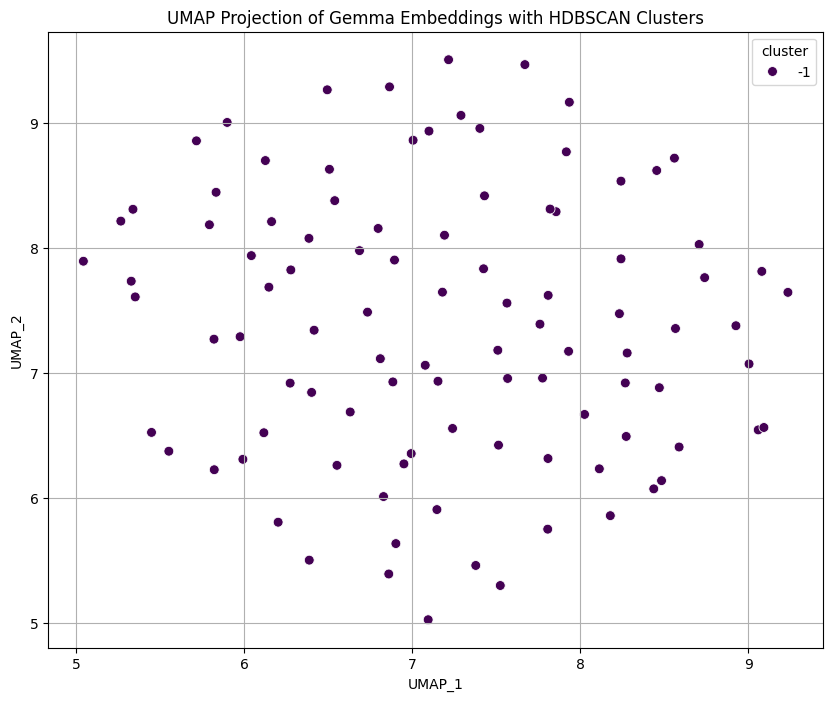

UMAP_1    UMAP_2  cluster  \
0  7.567607  6.956435       -1   
1  8.926696  7.377646       -1   
2  6.538512  8.377553       -1   
3  6.042014  7.938114       -1   
4  5.832116  8.444324       -1   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Extract the Gemma embeddings and HDBSCAN cluster labels from the DataFrame
embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma])
cluster_labels_gemma_hdbscan = df_gemma_hdbscan['hdbscan_cluster_label_gemma'].values


# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings_gemma_hdbscan = reducer.fit_transform(embeddings_gemma)

# Create a DataFrame for easy plotting
df_umap_gemma_hdbscan = pd.DataFrame(umap_embeddings_gemma_hdbscan, columns=['UMAP_1', 'UMAP_2'])
df_umap_gemma_hdbscan['cluster'] = cluster_labels_gemma_hdbscan
df_umap_gemma_hdbscan['link'] = df_gemma_hdbscan['link'] # Add links for potential future use

# Plot the UMAP embeddings
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='UMAP_1',
    y='UMAP_2',
    hue='cluster',
    data=df_umap_gemma_hdbscan,
    palette='viridis', # You can choose a different color palette
    legend='full',
    s=50 # Adjust point size
)
plt.title('UMAP Projection of Gemma Embeddings with HDBSCAN Clusters')
plt.xlabel('UMAP_1')
plt.ylabel('UMAP_2')
plt.grid(True)
plt.show()

# Display the DataFrame with UMAP coordinates and cluster labels
display(df_umap_gemma_hdbscan.head())

## Perform K-Means Clustering

### Subtask:
Apply K-Means clustering to the Gemma embeddings.

**Reasoning**:
Apply K-Means clustering to the Gemma embeddings and add the labels to the data.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import json

# Load Gemma embeddings (assuming report_embeddings_gemma is already loaded or load again)
try:
    with open('report_embeddings_gemma.json', 'r') as f:
        report_embeddings_gemma = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma.json' not found. Please ensure the Gemma embedding step was completed successfully.")
    report_embeddings_gemma = []

if report_embeddings_gemma:
    # Extract the embedding data into a NumPy array
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma])

    # Apply K-Means clustering
    # Choose the number of clusters (n_clusters). You might need to experiment with different values.
    n_clusters_gemma_kmeans = 5  # Example: Choose 5 clusters
    kmeans_gemma = KMeans(n_clusters=n_clusters_gemma_kmeans, random_state=42, n_init=10)
    kmeans_gemma.fit(embeddings_gemma)

    # Get cluster labels
    cluster_labels_gemma_kmeans = kmeans_gemma.labels_

    # Add K-Means cluster labels to the report_embeddings_gemma list
    for i, label in enumerate(cluster_labels_gemma_kmeans):
        # Ensure the index exists in report_embeddings_gemma before adding the label
        if i < len(report_embeddings_gemma):
             report_embeddings_gemma[i]['kmeans_cluster_label_gemma'] = int(label) # Store as int
        else:
            print(f"Warning: Index {i} out of bounds for report_embeddings_gemma. Skipping label assignment.")


    # Optionally, save the updated data with cluster labels
    with open('report_embeddings_gemma_with_kmeans_clusters.json', 'w') as f:
        json.dump(report_embeddings_gemma, f, indent=4)

    print(f"Applied K-Means clustering with {n_clusters_gemma_kmeans} clusters to Gemma embeddings.")
    print(f"Cluster labels added to data and saved to 'report_embeddings_gemma_with_kmeans_clusters.json'.")

else:
    print("No Gemma embeddings data loaded. Cannot perform K-Means clustering.")

Applied K-Means clustering with 5 clusters to Gemma embeddings.
Cluster labels added to data and saved to 'report_embeddings_gemma_with_kmeans_clusters.json'.


## Analyze K-Means Clusters

### Subtask:
Display the number of reports in each K-Means cluster and show example reports from each cluster.

**Reasoning**:
Create a pandas DataFrame from the updated list and display the count of reports per K-Means cluster and example reports from each cluster.

In [ ]:
import pandas as pd
import numpy as np

# Load the data with K-Means cluster labels (assuming report_embeddings_gemma is updated or load again)
try:
    with open('report_embeddings_gemma_with_kmeans_clusters.json', 'r') as f:
        report_embeddings_gemma_kmeans = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma_with_kmeans_clusters.json' not found. Please run the K-Means clustering step first.")
    report_embeddings_gemma_kmeans = []


if report_embeddings_gemma_kmeans:
    # Create a DataFrame from the list
    df_gemma_kmeans = pd.DataFrame(report_embeddings_gemma_kmeans)

    # Display the number of reports per K-Means cluster
    print("Number of reports per K-Means cluster (Gemma embeddings):")
    print(df_gemma_kmeans['kmeans_cluster_label_gemma'].value_counts())

    # Function to display example reports from a specific cluster
    def display_example_reports_gemma_kmeans(cluster_label, num_examples=3):
        print(f"\nExample reports from K-Means Cluster {cluster_label} (Gemma embeddings):")
        cluster_reports = df_gemma_kmeans[df_gemma_kmeans['kmeans_cluster_label_gemma'] == cluster_label]
        if cluster_reports.empty:
            print("No reports found in this cluster.")
            return

        # Display the links of example reports
        for i, row in cluster_reports.head(num_examples).iterrows():
            print(f"- {row['link']}")

    # Example usage: Display example reports from each unique cluster label
    unique_cluster_labels_gemma_kmeans = sorted(df_gemma_kmeans['kmeans_cluster_label_gemma'].unique())
    for cluster_label in unique_cluster_labels_gemma_kmeans:
         display_example_reports_gemma_kmeans(cluster_label)

else:
    print("No K-Means clustered data loaded. Cannot analyze clusters.")

Number of reports per K-Means cluster (Gemma embeddings):
kmeans_cluster_label_gemma
3    43
1    24
0    19
2    10
4     3
Name: count, dtype: int64

Example reports from K-Means Cluster 0 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=88824
- https://www.erowid.org/experiences/exp.php?ID=87176
- https://www.erowid.org/experiences/exp.php?ID=88380

Example reports from K-Means Cluster 1 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94073
- https://www.erowid.org/experiences/exp.php?ID=94770
- https://www.erowid.org/experiences/exp.php?ID=89351

Example reports from K-Means Cluster 2 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=95087
- https://www.erowid.org/experiences/exp.php?ID=58801
- https://www.erowid.org/experiences/exp.php?ID=56063

Example reports from K-Means Cluster 3 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94031
- https://www.erowid.org/experiences/exp.php?ID=92625
- https://www.e

## Visualize K-Means Clusters

### Subtask:
Use UMAP to reduce the dimensionality of the Gemma embeddings and visualize the K-Means clusters in 2D.

**Reasoning**:
Extract Gemma embeddings and K-Means cluster labels from the DataFrame, apply UMAP for dimensionality reduction, create a DataFrame for plotting, and generate a scatter plot to visualize the clusters in 2D.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


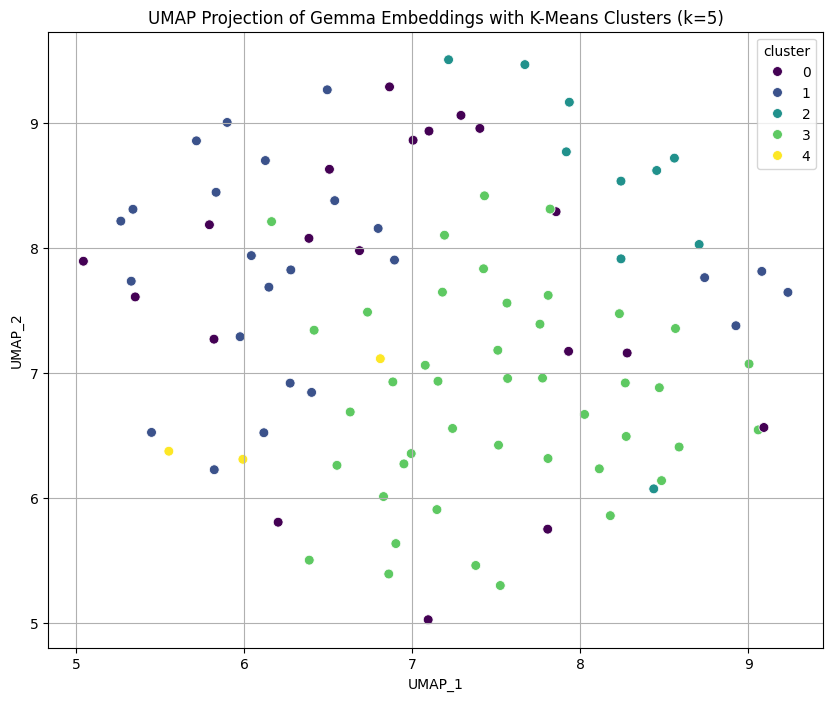

UMAP_1    UMAP_2  cluster  \
0  7.567607  6.956435        3   
1  8.926696  7.377646        1   
2  6.538512  8.377553        1   
3  6.042014  7.938114        1   
4  5.832116  8.444324        1   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the data with K-Means cluster labels (assuming df_gemma_kmeans is available or load again)
if 'df_gemma_kmeans' not in locals():
    try:
        with open('report_embeddings_gemma_with_kmeans_clusters.json', 'r') as f:
            report_embeddings_gemma_kmeans = json.load(f)
        df_gemma_kmeans = pd.DataFrame(report_embeddings_gemma_kmeans)
    except FileNotFoundError:
        print("Error: 'report_embeddings_gemma_with_kmeans_clusters.json' not found. Please run the K-Means clustering step first.")
        df_gemma_kmeans = None

if df_gemma_kmeans is not None and not df_gemma_kmeans.empty:
    # Extract the Gemma embeddings and K-Means cluster labels from the DataFrame
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma_kmeans])
    cluster_labels_gemma_kmeans = df_gemma_kmeans['kmeans_cluster_label_gemma'].values

    # Apply UMAP for dimensionality reduction
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings_gemma_kmeans = reducer.fit_transform(embeddings_gemma)

    # Create a DataFrame for easy plotting
    df_umap_gemma_kmeans = pd.DataFrame(umap_embeddings_gemma_kmeans, columns=['UMAP_1', 'UMAP_2'])
    df_umap_gemma_kmeans['cluster'] = cluster_labels_gemma_kmeans
    df_umap_gemma_kmeans['link'] = df_gemma_kmeans['link'] # Add links for potential future use

    # Plot the UMAP embeddings
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_gemma_kmeans,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of Gemma Embeddings with K-Means Clusters (k={len(set(cluster_labels_gemma_kmeans))})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_gemma_kmeans.head())

else:
    print("No K-Means clustered data loaded or DataFrame is empty. Cannot visualize clusters.")

## Perform Agglomerative Clustering

### Subtask:
Apply Agglomerative Hierarchical Clustering to the Gemma embeddings.

**Reasoning**:
Apply Agglomerative Hierarchical Clustering to the Gemma embeddings and add the labels to the data.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import json

# Load Gemma embeddings (assuming report_embeddings_gemma is already loaded or load again)
try:
    with open('report_embeddings_gemma.json', 'r') as f:
        report_embeddings_gemma = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma.json' not found. Please ensure the Gemma embedding step was completed successfully.")
    report_embeddings_gemma = []

if report_embeddings_gemma:
    # Extract the embedding data into a NumPy array
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma])

    # Apply Agglomerative Hierarchical Clustering
    # Choose the number of clusters (n_clusters). You might need to experiment with different values.
    n_clusters_gemma_agg = 5  # Example: Choose 5 clusters
    agg_clustering_gemma = AgglomerativeClustering(n_clusters=n_clusters_gemma_agg, linkage='ward') # 'ward' minimizes the variance of the clusters being merged
    agg_cluster_labels_gemma = agg_clustering_gemma.fit_predict(embeddings_gemma)

    # Add Agglomerative cluster labels to the report_embeddings_gemma list
    for i, label in enumerate(agg_cluster_labels_gemma):
         # Ensure the index exists in report_embeddings_gemma before adding the label
        if i < len(report_embeddings_gemma):
            report_embeddings_gemma[i]['agg_cluster_label_gemma'] = int(label) # Store as int
        else:
            print(f"Warning: Index {i} out of bounds for report_embeddings_gemma. Skipping label assignment.")


    # Optionally, save the updated data with cluster labels
    with open('report_embeddings_gemma_with_agg_clusters.json', 'w') as f:
        json.dump(report_embeddings_gemma, f, indent=4)

    print(f"Applied Agglomerative Hierarchical Clustering with {n_clusters_gemma_agg} clusters to Gemma embeddings.")
    print(f"Cluster labels added to data and saved to 'report_embeddings_gemma_with_agg_clusters.json'.")

else:
    print("No Gemma embeddings data loaded. Cannot perform Agglomerative clustering.")

Applied Agglomerative Hierarchical Clustering with 5 clusters to Gemma embeddings.
Cluster labels added to data and saved to 'report_embeddings_gemma_with_agg_clusters.json'.


## Analyze Agglomerative Clusters

### Subtask:
Display the number of reports in each Agglomerative cluster and show example reports from each cluster.

**Reasoning**:
Create a pandas DataFrame from the updated list and display the count of reports per Agglomerative cluster and example reports from each cluster.

In [ ]:
import pandas as pd
import numpy as np
import json

# Load the data with Agglomerative cluster labels
try:
    with open('report_embeddings_gemma_with_agg_clusters.json', 'r') as f:
        report_embeddings_gemma_agg = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma_with_agg_clusters.json' not found. Please run the Agglomerative clustering step first.")
    report_embeddings_gemma_agg = []


if report_embeddings_gemma_agg:
    # Create a DataFrame from the list
    df_gemma_agg = pd.DataFrame(report_embeddings_gemma_agg)

    # Display the number of reports per Agglomerative cluster
    print("Number of reports per Agglomerative cluster (Gemma embeddings):")
    print(df_gemma_agg['agg_cluster_label_gemma'].value_counts())

    # Function to display example reports from a specific cluster
    def display_example_reports_gemma_agg(cluster_label, num_examples=3):
        print(f"\nExample reports from Agglomerative Cluster {cluster_label} (Gemma embeddings):")
        cluster_reports = df_gemma_agg[df_gemma_agg['agg_cluster_label_gemma'] == cluster_label]
        if cluster_reports.empty:
            print("No reports found in this cluster.")
            return

        # Display the links of example reports
        for i, row in cluster_reports.head(num_examples).iterrows():
            print(f"- {row['link']}")

    # Example usage: Display example reports from each unique cluster label
    unique_cluster_labels_gemma_agg = sorted(df_gemma_agg['agg_cluster_label_gemma'].unique())
    for cluster_label in unique_cluster_labels_gemma_agg:
         display_example_reports_gemma_agg(cluster_label)

else:
    print("No Agglomerative clustered data loaded. Cannot analyze clusters.")

Number of reports per Agglomerative cluster (Gemma embeddings):
agg_cluster_label_gemma
0    42
3    22
1    14
4    14
2     7
Name: count, dtype: int64

Example reports from Agglomerative Cluster 0 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94031
- https://www.erowid.org/experiences/exp.php?ID=94073
- https://www.erowid.org/experiences/exp.php?ID=92625

Example reports from Agglomerative Cluster 1 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94770
- https://www.erowid.org/experiences/exp.php?ID=95087
- https://www.erowid.org/experiences/exp.php?ID=87906

Example reports from Agglomerative Cluster 2 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=89351
- https://www.erowid.org/experiences/exp.php?ID=91352
- https://www.erowid.org/experiences/exp.php?ID=78447

Example reports from Agglomerative Cluster 3 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=93223
- https://www.erowid.org/experiences/exp.p

## Visualize Agglomerative Clusters

### Subtask:
Use UMAP to reduce the dimensionality of the Gemma embeddings and visualize the Agglomerative clusters in 2D.

**Reasoning**:
Extract Gemma embeddings and Agglomerative cluster labels from the DataFrame, apply UMAP for dimensionality reduction, create a DataFrame for plotting, and generate a scatter plot to visualize the clusters in 2D.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


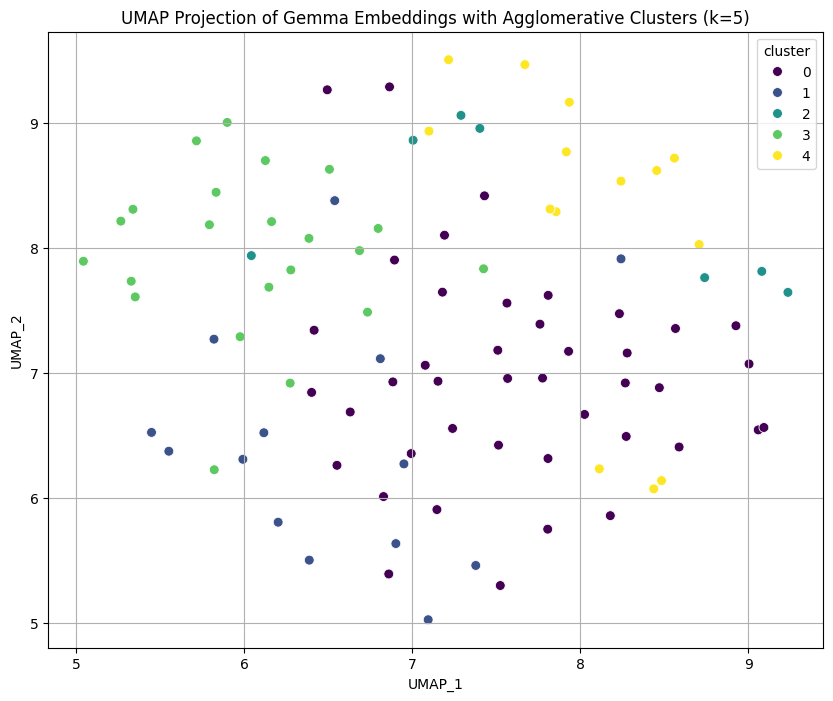

UMAP_1    UMAP_2  cluster  \
0  7.567607  6.956435        0   
1  8.926696  7.377646        0   
2  6.538512  8.377553        1   
3  6.042014  7.938114        2   
4  5.832116  8.444324        3   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the data with Agglomerative cluster labels (assuming df_gemma_agg is available or load again)
if 'df_gemma_agg' not in locals():
    try:
        with open('report_embeddings_gemma_with_agg_clusters.json', 'r') as f:
            report_embeddings_gemma_agg = json.load(f)
        df_gemma_agg = pd.DataFrame(report_embeddings_gemma_agg)
    except FileNotFoundError:
        print("Error: 'report_embeddings_gemma_with_agg_clusters.json' not found. Please run the Agglomerative clustering step first.")
        df_gemma_agg = None

if df_gemma_agg is not None and not df_gemma_agg.empty:
    # Extract the Gemma embeddings and Agglomerative cluster labels from the DataFrame
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma_agg])
    agg_cluster_labels_gemma = df_gemma_agg['agg_cluster_label_gemma'].values

    # Apply UMAP for dimensionality reduction
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings_gemma_agg = reducer.fit_transform(embeddings_gemma)

    # Create a DataFrame for easy plotting
    df_umap_gemma_agg = pd.DataFrame(umap_embeddings_gemma_agg, columns=['UMAP_1', 'UMAP_2'])
    df_umap_gemma_agg['cluster'] = agg_cluster_labels_gemma
    df_umap_gemma_agg['link'] = df_gemma_agg['link'] # Add links for potential future use

    # Plot the UMAP embeddings
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_gemma_agg,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of Gemma Embeddings with Agglomerative Clusters (k={len(set(agg_cluster_labels_gemma))})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_gemma_agg.head())

else:
    print("No Agglomerative clustered data loaded or DataFrame is empty. Cannot visualize clusters.")

# Evaluate All Clustering Results with Silhouette Score

### Subtask:
Calculate and display the Silhouette Score for K-Means and Agglomerative clustering on both original and Gemma embeddings.

**Reasoning**:
Load the embeddings and cluster labels for all clustering methods and calculate the Silhouette Score for each to compare their performance.

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import json

def calculate_silhouette_score(embeddings_data, cluster_labels_key, embedding_key, clustering_method_name):
    """Calculates and prints the Silhouette Score for a given clustering result."""
    if embeddings_data:
        embeddings = np.array([item[embedding_key] for item in embeddings_data if embedding_key in item and isinstance(item[embedding_key], list)])
        cluster_labels = np.array([item[cluster_labels_key] for item in embeddings_data if cluster_labels_key in item])

        # Ensure that embeddings and labels have the same length and are valid
        if len(embeddings) == len(cluster_labels) and len(embeddings) > 0:
             # Filter out noise points if present (for HDBSCAN)
            non_noise_indices = cluster_labels != -1
            filtered_embeddings = embeddings[non_noise_indices]
            filtered_cluster_labels = cluster_labels[non_noise_indices]

            # Calculate the Silhouette Score
            # The Silhouette Score is only defined if number of labels is 2 <= n_labels <= n_samples - 1
            if len(set(filtered_cluster_labels)) > 1 and len(set(filtered_cluster_labels)) < len(filtered_embeddings):
                silhouette_avg = silhouette_score(filtered_embeddings, filtered_cluster_labels)
                print(f"The average Silhouette Score for {clustering_method_name} is: {silhouette_avg:.4f}")
            else:
                print(f"Cannot compute Silhouette Score for {clustering_method_name}: Need at least 2 non-noise clusters and fewer clusters than non-noise samples.")
        else:
             print(f"Could not calculate Silhouette Score for {clustering_method_name}: Mismatch in data length or empty data.")

    else:
        print(f"No clustered data loaded for {clustering_method_name}. Cannot compute Silhouette Score.")


print("Calculating Silhouette Scores for all clustering results:")

# --- Original Embeddings ---

# K-Means on Original Embeddings
try:
    with open('report_embeddings_with_kmeans_clusters.json', 'r') as f:
        report_data_kmeans_orig = json.load(f)
    calculate_silhouette_score(report_data_kmeans_orig, 'kmeans_cluster_label', 'embedding', 'K-Means on Original Embeddings')
except FileNotFoundError:
    print("File not found: 'report_embeddings_with_kmeans_clusters.json'. Skipping evaluation for K-Means on Original Embeddings.")


# Agglomerative on Original Embeddings
try:
    with open('report_embeddings_with_agg_clusters.json', 'r') as f:
        report_data_agg_orig = json.load(f)
    calculate_silhouette_score(report_data_agg_orig, 'agg_cluster_label', 'embedding', 'Agglomerative on Original Embeddings')
except FileNotFoundError:
    print("File not found: 'report_embeddings_with_agg_clusters.json'. Skipping evaluation for Agglomerative on Original Embeddings.")

# --- Gemma Embeddings ---

# HDBSCAN on Gemma Embeddings (Handle noise points)
try:
    with open('report_embeddings_gemma_with_hdbscan_clusters.json', 'r') as f:
        report_data_hdbscan_gemma = json.load(f)
    calculate_silhouette_score(report_data_hdbscan_gemma, 'hdbscan_cluster_label_gemma', 'embedding_gemma', 'HDBSCAN on Gemma Embeddings')
except FileNotFoundError:
    print("File not found: 'report_embeddings_gemma_with_hdbscan_clusters.json'. Skipping evaluation for HDBSCAN on Gemma Embeddings.")

# K-Means on Gemma Embeddings
try:
    with open('report_embeddings_gemma_with_kmeans_clusters.json', 'r') as f:
        report_data_kmeans_gemma = json.load(f)
    calculate_silhouette_score(report_data_kmeans_gemma, 'kmeans_cluster_label_gemma', 'embedding_gemma', 'K-Means on Gemma Embeddings')
except FileNotFoundError:
    print("File not found: 'report_embeddings_gemma_with_kmeans_clusters.json'. Skipping evaluation for K-Means on Gemma Embeddings.")

# Agglomerative on Gemma Embeddings
try:
    with open('report_embeddings_gemma_with_agg_clusters.json', 'r') as f:
        report_data_agg_gemma = json.load(f)
    calculate_silhouette_score(report_data_agg_gemma, 'agg_cluster_label_gemma', 'embedding_gemma', 'Agglomerative on Gemma Embeddings')
except FileNotFoundError:
    print("File not found: 'report_embeddings_gemma_with_agg_clusters.json'. Skipping evaluation for Agglomerative on Gemma Embeddings.")

Calculating Silhouette Scores for all clustering results:
The average Silhouette Score for K-Means on Original Embeddings is: 0.0276
The average Silhouette Score for Agglomerative on Original Embeddings is: 0.0332
Cannot compute Silhouette Score for HDBSCAN on Gemma Embeddings: Need at least 2 non-noise clusters and fewer clusters than non-noise samples.
The average Silhouette Score for K-Means on Gemma Embeddings is: 0.0181
The average Silhouette Score for Agglomerative on Gemma Embeddings is: 0.0156


## Perform Spectral Clustering on Gemma Embeddings

### Subtask:
Apply Spectral Clustering to the Gemma embeddings using a cosine similarity matrix.

**Reasoning**:
Load the Gemma embeddings, calculate the cosine similarity matrix, apply Spectral Clustering using the similarity matrix, and add the cluster labels to the data.

Applied Spectral Clustering with 5 clusters to Gemma embeddings.
Cluster labels added to data and saved to 'report_embeddings_gemma_with_spectral_clusters.json'.

Number of reports per Spectral cluster (Gemma embeddings):
spectral_cluster_label_gemma
0    35
3    28
2    13
1    12
4    11
Name: count, dtype: int64

Example reports from Spectral Cluster 0 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94031
- https://www.erowid.org/experiences/exp.php?ID=92625
- https://www.erowid.org/experiences/exp.php?ID=93030

Example reports from Spectral Cluster 1 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=95087
- https://www.erowid.org/experiences/exp.php?ID=64854
- https://www.erowid.org/experiences/exp.php?ID=58801

Example reports from Spectral Cluster 2 (Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=93105
- https://www.erowid.org/experiences/exp.php?ID=87906
- https://www.erowid.org/experiences/exp.php?ID=82670

Example repor

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


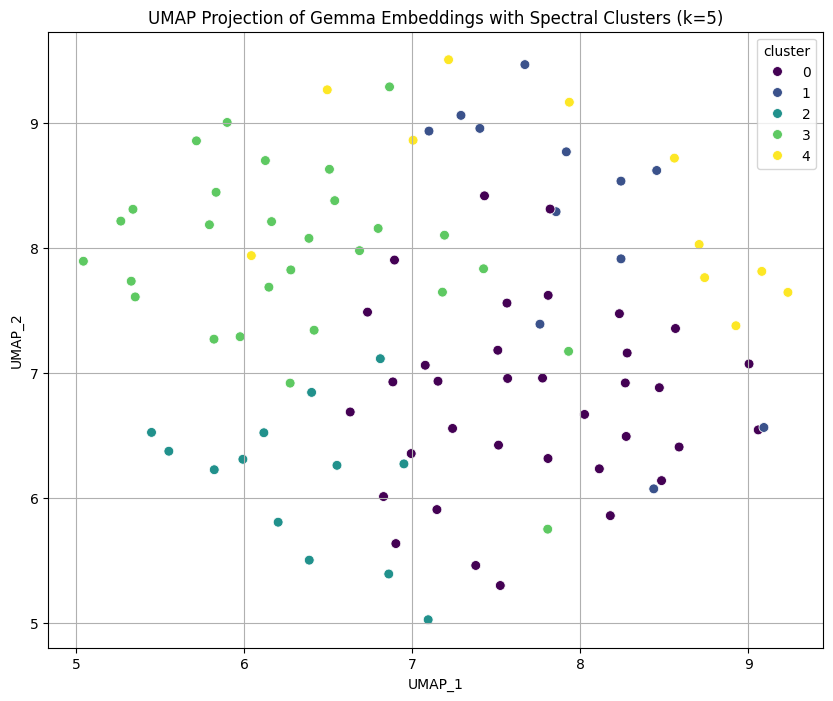

UMAP_1    UMAP_2  cluster  \
0  7.567607  6.956435        0   
1  8.926696  7.377646        4   
2  6.538512  8.377553        3   
3  6.042014  7.938114        4   
4  5.832116  8.444324        3   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import json
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Load Gemma embeddings
try:
    with open('report_embeddings_gemma.json', 'r') as f:
        report_embeddings_gemma = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma.json' not found. Please ensure the Gemma embedding step was completed successfully.")
    report_embeddings_gemma = []

if report_embeddings_gemma:
    # Extract the embedding data and links
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma])
    links_gemma = [item['link'] for item in report_embeddings_gemma]


    # Calculate the Cosine Similarity Matrix
    # Spectral Clustering typically uses an affinity matrix (similarity)
    similarity_matrix_gemma = cosine_similarity(embeddings_gemma)

    # Apply Spectral Clustering
    # Choose the number of clusters (n_clusters). You might need to experiment with different values.
    n_clusters_gemma_spectral = 5  # Example: Choose 5 clusters (same as K-Means/Agglomerative for comparison)

    # Use affinity='precomputed' to use the cosine similarity matrix
    spectral_clustering_gemma = SpectralClustering(
        n_clusters=n_clusters_gemma_spectral,
        affinity='precomputed',
        random_state=42,
        assign_labels='kmeans' # Can use 'kmeans' or 'discretize'
    )
    spectral_cluster_labels_gemma = spectral_clustering_gemma.fit_predict(similarity_matrix_gemma)

    # Add Spectral cluster labels to the report_embeddings_gemma list (in a new copy)
    report_embeddings_gemma_spectral = report_embeddings_gemma.copy()
    for i, label in enumerate(spectral_cluster_labels_gemma):
         # Ensure the index exists before adding the label
        if i < len(report_embeddings_gemma_spectral):
            report_embeddings_gemma_spectral[i]['spectral_cluster_label_gemma'] = int(label) # Store as int
        else:
            print(f"Warning: Index {i} out of bounds. Skipping label assignment for Spectral Clustering.")


    # Optionally, save the updated data with cluster labels
    with open('report_embeddings_gemma_with_spectral_clusters.json', 'w') as f:
        json.dump(report_embeddings_gemma_spectral, f, indent=4)

    print(f"Applied Spectral Clustering with {n_clusters_gemma_spectral} clusters to Gemma embeddings.")
    print(f"Cluster labels added to data and saved to 'report_embeddings_gemma_with_spectral_clusters.json'.")


    # --- Analyze Spectral Clusters ---

    print("\nNumber of reports per Spectral cluster (Gemma embeddings):")
    # Create a temporary DataFrame for analysis
    df_gemma_spectral_analysis = pd.DataFrame(report_embeddings_gemma_spectral)
    print(df_gemma_spectral_analysis['spectral_cluster_label_gemma'].value_counts())

    # Function to display example reports from a specific Spectral cluster
    def display_example_reports_gemma_spectral(cluster_label, num_examples=3):
        print(f"\nExample reports from Spectral Cluster {cluster_label} (Gemma embeddings):")
        cluster_reports = df_gemma_spectral_analysis[df_gemma_spectral_analysis['spectral_cluster_label_gemma'] == cluster_label]
        if cluster_reports.empty:
            print("No reports found in this cluster.")
            return

        # Display the links of example reports
        for i, row in cluster_reports.head(num_examples).iterrows():
            print(f"- {row['link']}")

    # Example usage: Display example reports from each unique cluster label
    unique_cluster_labels_gemma_spectral = sorted(df_gemma_spectral_analysis['spectral_cluster_label_gemma'].unique())
    for cluster_label in unique_cluster_labels_gemma_spectral:
         display_example_reports_gemma_spectral(cluster_label)


    # --- Visualize Spectral Clusters using UMAP ---

    print("\nVisualizing Spectral clusters using UMAP...")

    # Apply UMAP for dimensionality reduction (using the original embeddings for visualization)
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings_gemma = reducer.fit_transform(embeddings_gemma)

    # Create a DataFrame for easy plotting
    df_umap_gemma_spectral = pd.DataFrame(umap_embeddings_gemma, columns=['UMAP_1', 'UMAP_2'])
    df_umap_gemma_spectral['cluster'] = spectral_cluster_labels_gemma
    df_umap_gemma_spectral['link'] = links_gemma # Add links

    # Plot the UMAP embeddings with Spectral cluster labels
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_gemma_spectral,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of Gemma Embeddings with Spectral Clusters (k={n_clusters_gemma_spectral})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_gemma_spectral.head())


else:
    print("No Gemma embeddings data loaded. Cannot perform Spectral Clustering.")

# Silhouette Score for Spectral Clustering on Gemma Embeddings

### Subtask:
Calculate and display the Silhouette Score for the Spectral Clustering results on Gemma embeddings.

**Reasoning**:
Load the Gemma embeddings and Spectral cluster labels, and use the silhouette_score metric from scikit-learn to evaluate the quality of the Spectral clustering.

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
import json

# Load data with Spectral cluster labels for Gemma embeddings
try:
    with open('report_embeddings_gemma_with_spectral_clusters.json', 'r') as f:
        report_data_spectral_gemma = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma_with_spectral_clusters.json' not found. Please run the Spectral clustering step first.")
    report_data_spectral_gemma = []

if report_data_spectral_gemma:
    # Extract embeddings and Spectral cluster labels
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_data_spectral_gemma if 'embedding_gemma' in item and isinstance(item['embedding_gemma'], list)])
    spectral_cluster_labels_gemma = np.array([item['spectral_cluster_label_gemma'] for item in report_data_spectral_gemma if 'spectral_cluster_label_gemma' in item])

    # Ensure that embeddings and labels have the same length and are valid
    if len(embeddings_gemma) == len(spectral_cluster_labels_gemma) and len(embeddings_gemma) > 0:
        # Calculate the Silhouette Score
        # The Silhouette Score is only defined if number of labels is 2 <= n_labels <= n_samples - 1
        if len(set(spectral_cluster_labels_gemma)) > 1 and len(set(spectral_cluster_labels_gemma)) < len(embeddings_gemma):
            silhouette_avg_spectral_gemma = silhouette_score(embeddings_gemma, spectral_cluster_labels_gemma)
            print(f"The average Silhouette Score for Spectral Clustering on Gemma Embeddings is: {silhouette_avg_spectral_gemma:.4f}")
        else:
            print("Cannot compute Silhouette Score: Need at least 2 clusters and fewer clusters than samples.")
    else:
         print("Could not calculate Silhouette Score: Mismatch in data length or empty data.")


else:
    print("No Spectral clustered data loaded. Cannot compute Silhouette Score.")

The average Silhouette Score for Spectral Clustering on Gemma Embeddings is: 0.0189


## Reduce Gemma Embeddings to 100 Dimensions with UMAP

### Subtask:
Apply UMAP to the Gemma embeddings to reduce their dimensionality to 100.

**Reasoning**:
Load the Gemma embeddings, apply UMAP to reduce dimensionality to 100, and save the reduced embeddings.

In [ ]:
import umap
import numpy as np
import json

# Load Gemma embeddings
try:
    with open('report_embeddings_gemma.json', 'r') as f:
        report_embeddings_gemma = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma.json' not found. Please ensure the Gemma embedding step was completed successfully.")
    report_embeddings_gemma = []

if report_embeddings_gemma:
    # Extract the embedding data and links
    embeddings_gemma = np.array([item['embedding_gemma'] for item in report_embeddings_gemma if 'embedding_gemma' in item and isinstance(item['embedding_gemma'], list)])
    links_gemma = [item['link'] for item in report_embeddings_gemma if 'link' in item]

    if len(embeddings_gemma) > 0:
        # Apply UMAP for dimensionality reduction
        # Reduce to 50 dimensions
        reducer = umap.UMAP(n_components=50, random_state=42)
        reduced_embeddings_gemma = reducer.fit_transform(embeddings_gemma)

        # Create a list of dictionaries for saving
        reduced_embeddings_data = []
        for i, embedding in enumerate(reduced_embeddings_gemma):
            reduced_embeddings_data.append({
                'link': links_gemma[i], # Assuming links are in the same order
                'embedding_gemma_reduced_50': embedding.tolist() # Store reduced embeddings
            })

        # Save the reduced embeddings to a JSON file
        with open('report_embeddings_gemma_reduced_50.json', 'w') as f:
            json.dump(reduced_embeddings_data, f, indent=4)

        print(f"Reduced Gemma embeddings to 50 dimensions using UMAP.")
        print(f"Reduced embeddings saved to 'report_embeddings_gemma_reduced_50.json'.")
    else:
        print("No valid Gemma embeddings found to reduce dimensionality.")

else:
    print("No Gemma embeddings data loaded. Cannot perform dimensionality reduction.")

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced Gemma embeddings to 50 dimensions using UMAP.
Reduced embeddings saved to 'report_embeddings_gemma_reduced_50.json'.


In [ ]:
import json
import numpy as np

# Load Gemma embeddings
try:
    with open('report_embeddings_gemma.json', 'r') as f:
        report_embeddings_gemma = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma.json' not found. Please ensure the Gemma embedding step was completed successfully.")
    report_embeddings_gemma = []

if report_embeddings_gemma:
    # Get the first embedding and check its length
    first_embedding = report_embeddings_gemma[0]['embedding_gemma']
    dimensionality = len(first_embedding)
    print(f"The current dimensionality of the Gemma embeddings is: {dimensionality}")
else:
    print("No Gemma embeddings data loaded. Cannot determine dimensionality.")

The current dimensionality of the Gemma embeddings is: 768


## Load Reduced Gemma Embeddings

### Subtask:
Load the 50-dimensional Gemma embeddings from `report_embeddings_gemma_reduced_50.json`.

**Reasoning**:
Load the 50-dimensional Gemma embeddings from the specified JSON file.

In [ ]:
import json

try:
    with open('report_embeddings_gemma_reduced_50.json', 'r') as f:
        report_embeddings_gemma_reduced = json.load(f)
    print(f"Loaded {len(report_embeddings_gemma_reduced)} reduced embeddings from report_embeddings_gemma_reduced_50.json")
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma_reduced_50.json' not found. Please ensure the dimensionality reduction step was completed successfully.")
    report_embeddings_gemma_reduced = []

Loaded 99 reduced embeddings from report_embeddings_gemma_reduced_50.json


## Perform K-Means Clustering on Reduced Embeddings

### Subtask:
Apply K-Means clustering to the 50-dimensional Gemma embeddings.

**Reasoning**:
Extract the 50-dimensional Gemma embeddings, apply K-Means clustering, and add the cluster labels to the data.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import json

# Assuming report_embeddings_gemma_reduced is loaded from the previous step

if report_embeddings_gemma_reduced:
    # Extract the 50-dimensional embedding data into a NumPy array
    embeddings_gemma_reduced = np.array([item['embedding_gemma_reduced_50'] for item in report_embeddings_gemma_reduced if 'embedding_gemma_reduced_50' in item and isinstance(item['embedding_gemma_reduced_50'], list)])
    links_gemma_reduced = [item['link'] for item in report_embeddings_gemma_reduced if 'link' in item]


    # Apply K-Means clustering
    # Choose the number of clusters (n_clusters). You might need to experiment with different values.
    n_clusters_gemma_reduced_kmeans = 5  # Example: Choose 5 clusters (can be adjusted)
    kmeans_gemma_reduced = KMeans(n_clusters=n_clusters_gemma_reduced_kmeans, random_state=42, n_init=10)
    kmeans_gemma_reduced.fit(embeddings_gemma_reduced)

    # Get cluster labels
    cluster_labels_gemma_reduced_kmeans = kmeans_gemma_reduced.labels_

    # Add K-Means cluster labels back to the reduced embeddings data structure
    # Ensure the order of labels matches the order of embeddings
    for i, label in enumerate(cluster_labels_gemma_reduced_kmeans):
        if i < len(report_embeddings_gemma_reduced):
            report_embeddings_gemma_reduced[i]['kmeans_cluster_label_gemma_reduced'] = int(label) # Store as int
        else:
            print(f"Warning: Index {i} out of bounds. Skipping label assignment for K-Means on reduced embeddings.")


    # Optionally, save the updated data with cluster labels
    with open('report_embeddings_gemma_reduced_50_with_kmeans_clusters.json', 'w') as f:
        json.dump(report_embeddings_gemma_reduced, f, indent=4)

    print(f"Applied K-Means clustering with {n_clusters_gemma_reduced_kmeans} clusters to 50-dimensional Gemma embeddings.")
    print(f"Cluster labels added to data and saved to 'report_embeddings_gemma_reduced_50_with_kmeans_clusters.json'.")

else:
    print("No reduced Gemma embeddings data loaded. Cannot perform K-Means clustering.")

Applied K-Means clustering with 5 clusters to 50-dimensional Gemma embeddings.
Cluster labels added to data and saved to 'report_embeddings_gemma_reduced_50_with_kmeans_clusters.json'.


## Analyze K-Means Clusters (Reduced Embeddings)

### Subtask:
Display the number of reports in each K-Means cluster on the reduced embeddings and show example reports from each cluster.

**Reasoning**:
Create a pandas DataFrame from the updated list and display the count of reports per K-Means cluster and example reports from each cluster.

In [ ]:
import pandas as pd
import numpy as np
import json

# Load the data with K-Means cluster labels for reduced embeddings
try:
    with open('report_embeddings_gemma_reduced_50_with_kmeans_clusters.json', 'r') as f:
        report_embeddings_gemma_reduced_kmeans = json.load(f)
except FileNotFoundError:
    print("Error: 'report_embeddings_gemma_reduced_50_with_kmeans_clusters.json' not found. Please run the K-Means clustering step on reduced embeddings first.")
    report_embeddings_gemma_reduced_kmeans = []


if report_embeddings_gemma_reduced_kmeans:
    # Create a DataFrame from the list
    df_gemma_reduced_kmeans = pd.DataFrame(report_embeddings_gemma_reduced_kmeans)

    # Display the number of reports per K-Means cluster
    print("Number of reports per K-Means cluster (50-dim Gemma embeddings):")
    print(df_gemma_reduced_kmeans['kmeans_cluster_label_gemma_reduced'].value_counts())

    # Function to display example reports from a specific cluster
    def display_example_reports_gemma_reduced_kmeans(cluster_label, num_examples=3):
        print(f"\nExample reports from K-Means Cluster {cluster_label} (50-dim Gemma embeddings):")
        cluster_reports = df_gemma_reduced_kmeans[df_gemma_reduced_kmeans['kmeans_cluster_label_gemma_reduced'] == cluster_label]
        if cluster_reports.empty:
            print("No reports found in this cluster.")
            return

        # Display the links of example reports
        for i, row in cluster_reports.head(num_examples).iterrows():
            print(f"- {row['link']}")

    # Example usage: Display example reports from each unique cluster label
    unique_cluster_labels_gemma_reduced_kmeans = sorted(df_gemma_reduced_kmeans['kmeans_cluster_label_gemma_reduced'].unique())
    for cluster_label in unique_cluster_labels_gemma_reduced_kmeans:
         display_example_reports_gemma_reduced_kmeans(cluster_label)

else:
    print("No K-Means clustered data on reduced embeddings loaded. Cannot analyze clusters.")

Number of reports per K-Means cluster (50-dim Gemma embeddings):
kmeans_cluster_label_gemma_reduced
2    25
4    24
0    23
3    17
1    10
Name: count, dtype: int64

Example reports from K-Means Cluster 0 (50-dim Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94770
- https://www.erowid.org/experiences/exp.php?ID=93223
- https://www.erowid.org/experiences/exp.php?ID=88824

Example reports from K-Means Cluster 1 (50-dim Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94073
- https://www.erowid.org/experiences/exp.php?ID=91352
- https://www.erowid.org/experiences/exp.php?ID=92625

Example reports from K-Means Cluster 2 (50-dim Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=94031
- https://www.erowid.org/experiences/exp.php?ID=93030
- https://www.erowid.org/experiences/exp.php?ID=95155

Example reports from K-Means Cluster 3 (50-dim Gemma embeddings):
- https://www.erowid.org/experiences/exp.php?ID=89351
- https://www.erowid.org/e

## Visualize K-Means Clusters (Reduced Embeddings)

### Subtask:
Use UMAP to reduce the dimensionality of the 50-dimensional Gemma embeddings and visualize the K-Means clusters in 2D.

**Reasoning**:
Extract the 50-dimensional Gemma embeddings and K-Means cluster labels, apply UMAP for dimensionality reduction to 2D, create a DataFrame for plotting, and generate a scatter plot to visualize the clusters.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


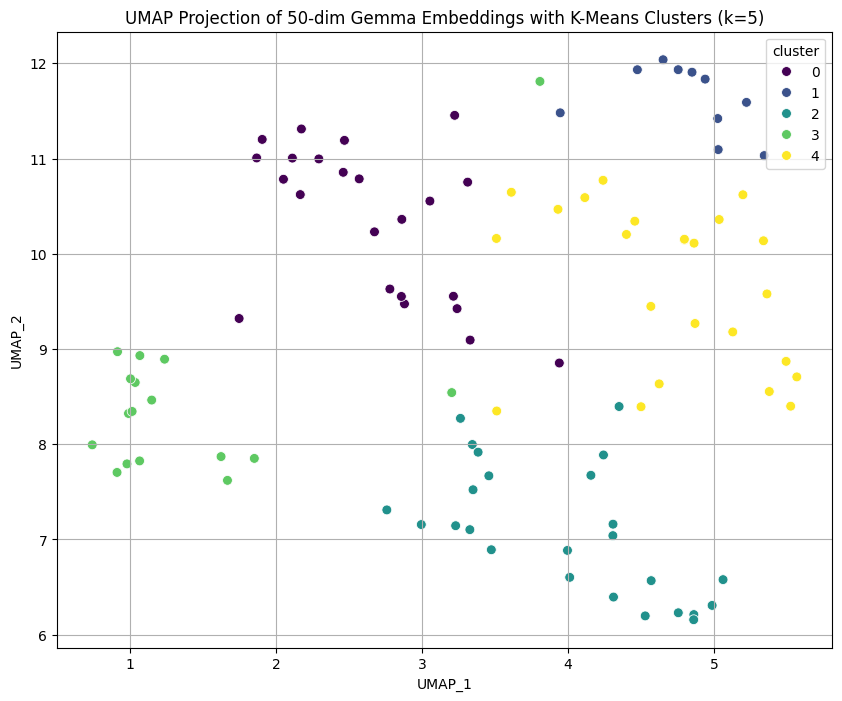

UMAP_1     UMAP_2  cluster  \
0  4.243133   7.887372        2   
1  4.939542  11.833917        1   
2  3.223787  11.453638        0   
3  3.203699   8.542414        3   
4  2.468823  11.190931        0   

                                                link  
0  https://www.erowid.org/experiences/exp.php?ID=...  
1  https://www.erowid.org/experiences/exp.php?ID=...  
2  https://www.erowid.org/experiences/exp.php?ID=...  
3  https://www.erowid.org/experiences/exp.php?ID=...  
4  https://www.erowid.org/experiences/exp.php?ID=...

In [ ]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the data with K-Means cluster labels for reduced embeddings (assuming df_gemma_reduced_kmeans is available or load again)
if 'df_gemma_reduced_kmeans' not in locals():
    try:
        with open('report_embeddings_gemma_reduced_50_with_kmeans_clusters.json', 'r') as f:
            report_embeddings_gemma_reduced_kmeans = json.load(f)
        df_gemma_reduced_kmeans = pd.DataFrame(report_embeddings_gemma_reduced_kmeans)
    except FileNotFoundError:
        print("Error: 'report_embeddings_gemma_reduced_50_with_kmeans_clusters.json' not found. Please run the K-Means clustering step on reduced embeddings first.")
        df_gemma_reduced_kmeans = None

if df_gemma_reduced_kmeans is not None and not df_gemma_reduced_kmeans.empty:
    # Extract the 50-dimensional Gemma embeddings and K-Means cluster labels
    embeddings_gemma_reduced = np.array([item['embedding_gemma_reduced_50'] for item in report_embeddings_gemma_reduced_kmeans if 'embedding_gemma_reduced_50' in item and isinstance(item['embedding_gemma_reduced_50'], list)])
    cluster_labels_gemma_reduced_kmeans = df_gemma_reduced_kmeans['kmeans_cluster_label_gemma_reduced'].values
    links_gemma_reduced = df_gemma_reduced_kmeans['link'].values


    # Apply UMAP for dimensionality reduction to 2D for visualization
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_embeddings_gemma_reduced_kmeans = reducer.fit_transform(embeddings_gemma_reduced)

    # Create a DataFrame for easy plotting
    df_umap_gemma_reduced_kmeans = pd.DataFrame(umap_embeddings_gemma_reduced_kmeans, columns=['UMAP_1', 'UMAP_2'])
    df_umap_gemma_reduced_kmeans['cluster'] = cluster_labels_gemma_reduced_kmeans
    df_umap_gemma_reduced_kmeans['link'] = links_gemma_reduced # Add links

    # Plot the UMAP embeddings
    plt.figure(figsize=(10, 8))
    scatter = sns.scatterplot(
        x='UMAP_1',
        y='UMAP_2',
        hue='cluster',
        data=df_umap_gemma_reduced_kmeans,
        palette='viridis', # You can choose a different color palette
        legend='full',
        s=50 # Adjust point size
    )
    plt.title(f'UMAP Projection of 50-dim Gemma Embeddings with K-Means Clusters (k={len(set(cluster_labels_gemma_reduced_kmeans))})')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.grid(True)
    plt.show()

    # Display the DataFrame with UMAP coordinates and cluster labels
    display(df_umap_gemma_reduced_kmeans.head())

else:
    print("No K-Means clustered data on reduced embeddings loaded or DataFrame is empty. Cannot visualize clusters.")